# **1. Proyecto Data Science G56: Predicción estadio de cáncer de mama**

- Integrantes:
    * Macarena Araneda.
    * Marlene Concha.
    * Francisca Gálvez.
    * Daniel Herrera.
    * Jairo Rojas.
    * Javier Rojas.

- Profesor:

    * Camilo González.



## 1.1 Definición del problema.
La gran cantidad de datos que existen en el país sobre el cáncer de mama, por lo general, no se encuentran tabulados, ni estructurados, es por ello, que se debe recalcar la importancia de mejorar la calidad de los datos en salud.

## 1.2 Solución propuesta.
Con una data limpia y estructurada se pueden analizar datos y tomar decisiones informadas. Además, se puede trabajar en modelos predictivos, que pueden ser una herramienta de apoyo a la hora de priorizar pacientes.

El objetivo de este proyecto es trabajar en un modelo que permita predecir el estadio del cáncer de mama, a partir de datos patológicos y clínicos asociados al cáncer. Con esto, se espera generar una herramienta que permita predecir qué tan agresivo es o será el cáncer de mama. Lo anterior, podría ayudar a los referentes clínicos a priorizar la atención de pacientes según la gravedad de su neoplasia.

## 1.3 Objetivo principal
El objetivo es desarrollar un proyecto que priorice la atención médica a los pacientes con cáncer de mama, entregando un enfoque predictivo y basado en datos entregados por el equipo de Informática Médica y Data Science de la FALP (Fundación Arturo López Pérez).

## 1.4 Naturaleza de los datos.
El dataset contiene la cantidad de 24 columnas y 19.110 filas.
* RegistroTumores_FALP.csv = 19110 rows × 24 columns.* RegistroTumores_FALP.csv = 19110 rows × 24 columns.

## 1.5 Columnas del Dataset


1. **ID_CASO**: ID del paciente.
2. **CATEGORIA**: Categoría diagnóstica del tumor (ej.: órgano digestivo).
3. **SUBCATEGORIA**: Subcategoría diagnóstica del tumor (ej.: colon, páncreas o estómago).
4. **SEXO**: Sexo paciente. Opciones: F o M, Femenino o Masculino respectivamente.
5. **EDAD**: Edad del paciente.
6. **REGIÓN**: Región del país de residencia.
7. **COMUNA**: Comuna o condado de residencia.
8. **CODIGO_COMUNA**: Código único territorial.
9. **PREVISIÓN**: Seguro médico del paciente. Opciones: FONASA, BENEFICIARIO, ISAPRE, PARTICULAR, FFAA.
10. **CONVENIO_ONCOLOGICO**: Beneficiario FALP. Opciones: SI, NO.
11. **FECHA_DIAGNOSTICO**: Fecha del tamaño del tumor.
13. **CN**: Descripción clínica si el tumor ha alcanzado ganglios linfáticos.
14. **CM**: Descripción clínica si el cáncer hizo metástasis.
15. **PT**: Descripción patológica del tamaño del tumor.
16. **PN**: Descripción patológica si el tumor ha alcanzado ganglios linfáticos.
17. **PM**: Descripción patológica si el cáncer hizo metástasis.
18. **ESTADIO**: Estadio del cáncer en la fecha de diagnóstico. Opciones: O, I, II, III, IV.
19. **EXTENSION_DIAGNOSTICA**: Extensión del tumor en la fecha de diagnóstico. Opciones: LOCAL, REGIONAL, AVANZADO, PERITONEAL.
20. **ESTADO_VITAL**: estado vital del paciente. Opciones: VIVO, FALLECIDO.
21. **FECHA_DEFUNCION**: Fecha de fallecimiento.
22. **TTO_FALP_SUBCATEGORIA**: Subcategoría del tratamiento.
23. **FECHA_INICIO_TTO**: Fecha de inicio del tratamiento.
24. **FECHA_FIN_TTO**: Fecha de finalización del tratamiento.

## 1.6 Vector objetivo.
* El vector objetivo será la variable STATUS que determinaremos según la agrupación de la variable ESTADIO.

# **2. Importación de módulos**
Para comenzar con nuestro análisis realizaremos la importación de todos los módulos necesarios.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

# Análisis exploratorio
from ydata_profiling import ProfileReport
import missingno

# Modelamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Otros
import warnings

# Funciones externas
import funciones as fx

warnings.filterwarnings('ignore')
sns.set_style()

color_palette = ["#3AA6B9",
"#FFD0D0",
"#FF9EAA",
"#C1ECE4",
"#595959"]

sns.set_palette(color_palette)

plt.rcParams['figure.figsize'] = (20, 6)

## 2.1 Importar base de datos

In [2]:
# Lectura de la base de datos desde el csv
df_falp = pd.read_csv("RegistroTumores_FALP.csv")

In [3]:
display(df_falp)
display(df_falp["CATEGORIA"].value_counts())

,ID_CASO,CATEGORIA,SUBCATEGORIA,SEXO,EDAD,REGION,COMUNA,CODIGO_COMUNA,PREVISION,CONVENIO_ONCOLOGICO,...,PT,PN,PM,ESTADIO,EXTENSION_DIAGNOSTICO,ESTADO_VITAL,FECHA_DEFUNCION,TTO_FALP_SUBCATEGORIA,FECHA_INICIO_TTO,FECHA_FIN_TTO
0,1,MAMA,"MAMA (excluye piel de la mama, C44.5)",F,78,metropolitana,la cisterna,13109,BENEFICIARIO,SI,...,NaN,NaN,NaN,I,LOCAL,VIVO,NaN,CIRUGÍA,2017-08-24,2017-08-24
1,1,MAMA,"MAMA (excluye piel de la mama, C44.5)",F,78,metropolitana,la cisterna,13109,BENEFICIARIO,SI,...,NaN,NaN,NaN,I,LOCAL,VIVO,NaN,RADIOTERAPIA,NaN,NaN
2,1,MAMA,"MAMA (excluye piel de la mama, C44.5)",F,78,metropolitana,la cisterna,13109,BENEFICIARIO,SI,...,NaN,NaN,NaN,I,LOCAL,VIVO,NaN,HORMONOTERAPIA,NaN,NaN
3,2,TIROIDES Y OTRAS GLANDULAS ENDOCRINAS,GLÁNDULA TIROIDES,F,52,aysen del gral carlos ibanez del campo,coyhaique,11101,BENEFICIARIO,NO,...,NaN,NaN,NaN,NaN,REGIONAL,VIVO,NaN,CIRUGÍA,2017-08-21,2017-08-21
4,2,TIROIDES Y OTRAS GLANDULAS ENDOCRINAS,GLÁNDULA TIROIDES,F,52,aysen del gral carlos ibanez del campo,coyhaique,11101,BENEFICIARIO,NO,...,NaN,NaN,NaN,NaN,REGIONAL,VIVO,NaN,RADIOFÁRMACO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,22793,MAMA,"MAMA (excluye piel de la mama, C44.5)",F,59,metropolitana,maipu,13119,ISAPRE,NaN,...,T0,N0,Mx,III,REGIONAL,VIVO,NaN,QUIMIOTERAPIA + INMUNOTERAPIA,2020-01-24,2020-05-08
19106,22793,MAMA,"MAMA (excluye piel de la mama, C44.5)",F,59,metropolitana,maipu,13119,ISAPRE,NaN,...,T0,N0,Mx,III,REGIONAL,VIVO,NaN,RADIOTERAPIA,2020-08-24,2020-09-11
19107,22807,TRACTO URINARIO,VEJIGA URINARIA,M,85,metropolitana,providencia,13123,FONASA,NaN,...,T1,Nx,Mx,I,LOCAL,VIVO,NaN,RADIOTERAPIA,2021-12-22,2022-01-19
19108,22807,TRACTO URINARIO,VEJIGA URINARIA,M,85,metropolitana,providencia,13123,FONASA,NaN,...,T1,Nx,Mx,I,LOCAL,VIVO,NaN,RESECCIÓN ENDOSCÓPICA,2021-10-20,NaN


MAMA                                                         5575
ORGANOS DIGESTIVOS                                           3290
PIEL                                                         2296
ORGANOS GENITALES MASCULINOS                                 1859
TIROIDES Y OTRAS GLANDULAS ENDOCRINAS                        1491
TRACTO URINARIO                                              1291
ORGANOS GENITALES FEMENINOS                                  1258
SISTEMA RESPIRATORIO Y ÓRGANOS INTRATORÁCICOS                1059
LABIO, CAVIDAD BUCAL Y FARINGE                                324
TEJIDO CONJUNTIVO, SUBCUTÁNEO Y DE OTROS TEJIDOS BLANDOS      205
ENCÉFALO, OJO Y OTRAS PARTES DEL SISTEMA NERVIOSO CENTRAL     183
SITIO PRIMARIO DESCONOCIDO                                    159
HUESOS,ARTICULACIONES Y CARTÍLAGO ARTICULAR                    68
PERITONEO Y RETROPERITONEO                                     47
SITIOS MAL DEFINIDOS Y OTROS                                    4
NERVIOS PE

- La base de datos completa presenta 19119 filas y 24 columnas.
- Al analizar la distribucion de los tipos de cancer, se observo que el cancer de mama es el
mas frecuente dentro de la base de datos. Debido a lo anterior, se decidio centrar el proyecto
en este tipo de cancer. 

## 2.2 Filtro de cancer de mama

In [4]:
mama = df_falp.query("CATEGORIA == 'MAMA'")
display(mama)


,ID_CASO,CATEGORIA,SUBCATEGORIA,SEXO,EDAD,REGION,COMUNA,CODIGO_COMUNA,PREVISION,CONVENIO_ONCOLOGICO,...,PT,PN,PM,ESTADIO,EXTENSION_DIAGNOSTICO,ESTADO_VITAL,FECHA_DEFUNCION,TTO_FALP_SUBCATEGORIA,FECHA_INICIO_TTO,FECHA_FIN_TTO
0,1,MAMA,"MAMA (excluye piel de la mama, C44.5)",F,78,metropolitana,la cisterna,13109,BENEFICIARIO,SI,...,NaN,NaN,NaN,I,LOCAL,VIVO,NaN,CIRUGÍA,2017-08-24,2017-08-24
1,1,MAMA,"MAMA (excluye piel de la mama, C44.5)",F,78,metropolitana,la cisterna,13109,BENEFICIARIO,SI,...,NaN,NaN,NaN,I,LOCAL,VIVO,NaN,RADIOTERAPIA,NaN,NaN
2,1,MAMA,"MAMA (excluye piel de la mama, C44.5)",F,78,metropolitana,la cisterna,13109,BENEFICIARIO,SI,...,NaN,NaN,NaN,I,LOCAL,VIVO,NaN,HORMONOTERAPIA,NaN,NaN
33,26,MAMA,"MAMA (excluye piel de la mama, C44.5)",F,73,metropolitana,nunoa,13120,BENEFICIARIO,SI,...,NaN,NaN,NaN,I,LOCAL,VIVO,NaN,HORMONOTERAPIA,NaN,NaN
34,26,MAMA,"MAMA (excluye piel de la mama, C44.5)",F,73,metropolitana,nunoa,13120,BENEFICIARIO,SI,...,NaN,NaN,NaN,I,LOCAL,VIVO,NaN,RADIOTERAPIA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19098,22580,MAMA,"MAMA (excluye piel de la mama, C44.5)",F,83,metropolitana,lo prado,13117,BENEFICIARIO,NO,...,NaN,NaN,NaN,III,REGIONAL,VIVO,NaN,HORMONOTERAPIA,2021-01-08,NaN
19103,22793,MAMA,"MAMA (excluye piel de la mama, C44.5)",F,59,metropolitana,maipu,13119,ISAPRE,NaN,...,T0,N0,Mx,III,REGIONAL,VIVO,NaN,INMUNOTERAPIA,2020-01-24,2021-01-14
19104,22793,MAMA,"MAMA (excluye piel de la mama, C44.5)",F,59,metropolitana,maipu,13119,ISAPRE,NaN,...,T0,N0,Mx,III,REGIONAL,VIVO,NaN,CIRUGÍA,2020-06-30,NaN
19105,22793,MAMA,"MAMA (excluye piel de la mama, C44.5)",F,59,metropolitana,maipu,13119,ISAPRE,NaN,...,T0,N0,Mx,III,REGIONAL,VIVO,NaN,QUIMIOTERAPIA + INMUNOTERAPIA,2020-01-24,2020-05-08


- Existen 5575 registros de cancer de mama en la base de datos

# **3. Análisis Exploratorio de datos iniciales**

In [5]:
# Reporte e información de la base de datos
# profile_falp_mama = ProfileReport(mama)
# profile_falp_mama.to_file("your_report_cancer_mamario.html")
# display(profile_falp_mama)


## 3.1 Exploración de la base de datos
Examinar la estructura de la base de datos, sus columnas y el tipo de información luego de su preprocesamiento con el objetivo de comprender la organización de estos.

In [6]:
mama.info()
# Obtenemos la descripción general de las columnas, los tipos de datos y la cantidad de valores no nulos cada columna.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5575 entries, 0 to 19106
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID_CASO                5575 non-null   int64 
 1   CATEGORIA              5575 non-null   object
 2   SUBCATEGORIA           5575 non-null   object
 3   SEXO                   5575 non-null   object
 4   EDAD                   5575 non-null   int64 
 5   REGION                 5575 non-null   object
 6   COMUNA                 5575 non-null   object
 7   CODIGO_COMUNA          5575 non-null   int64 
 8   PREVISION              5575 non-null   object
 9   CONVENIO_ONCOLOGICO    5544 non-null   object
 10  FECHA_DIAGNOSTICO      5575 non-null   object
 11  CT                     3670 non-null   object
 12  CN                     3754 non-null   object
 13  CM                     3901 non-null   object
 14  PT                     3501 non-null   object
 15  PN                  

<Axes: >

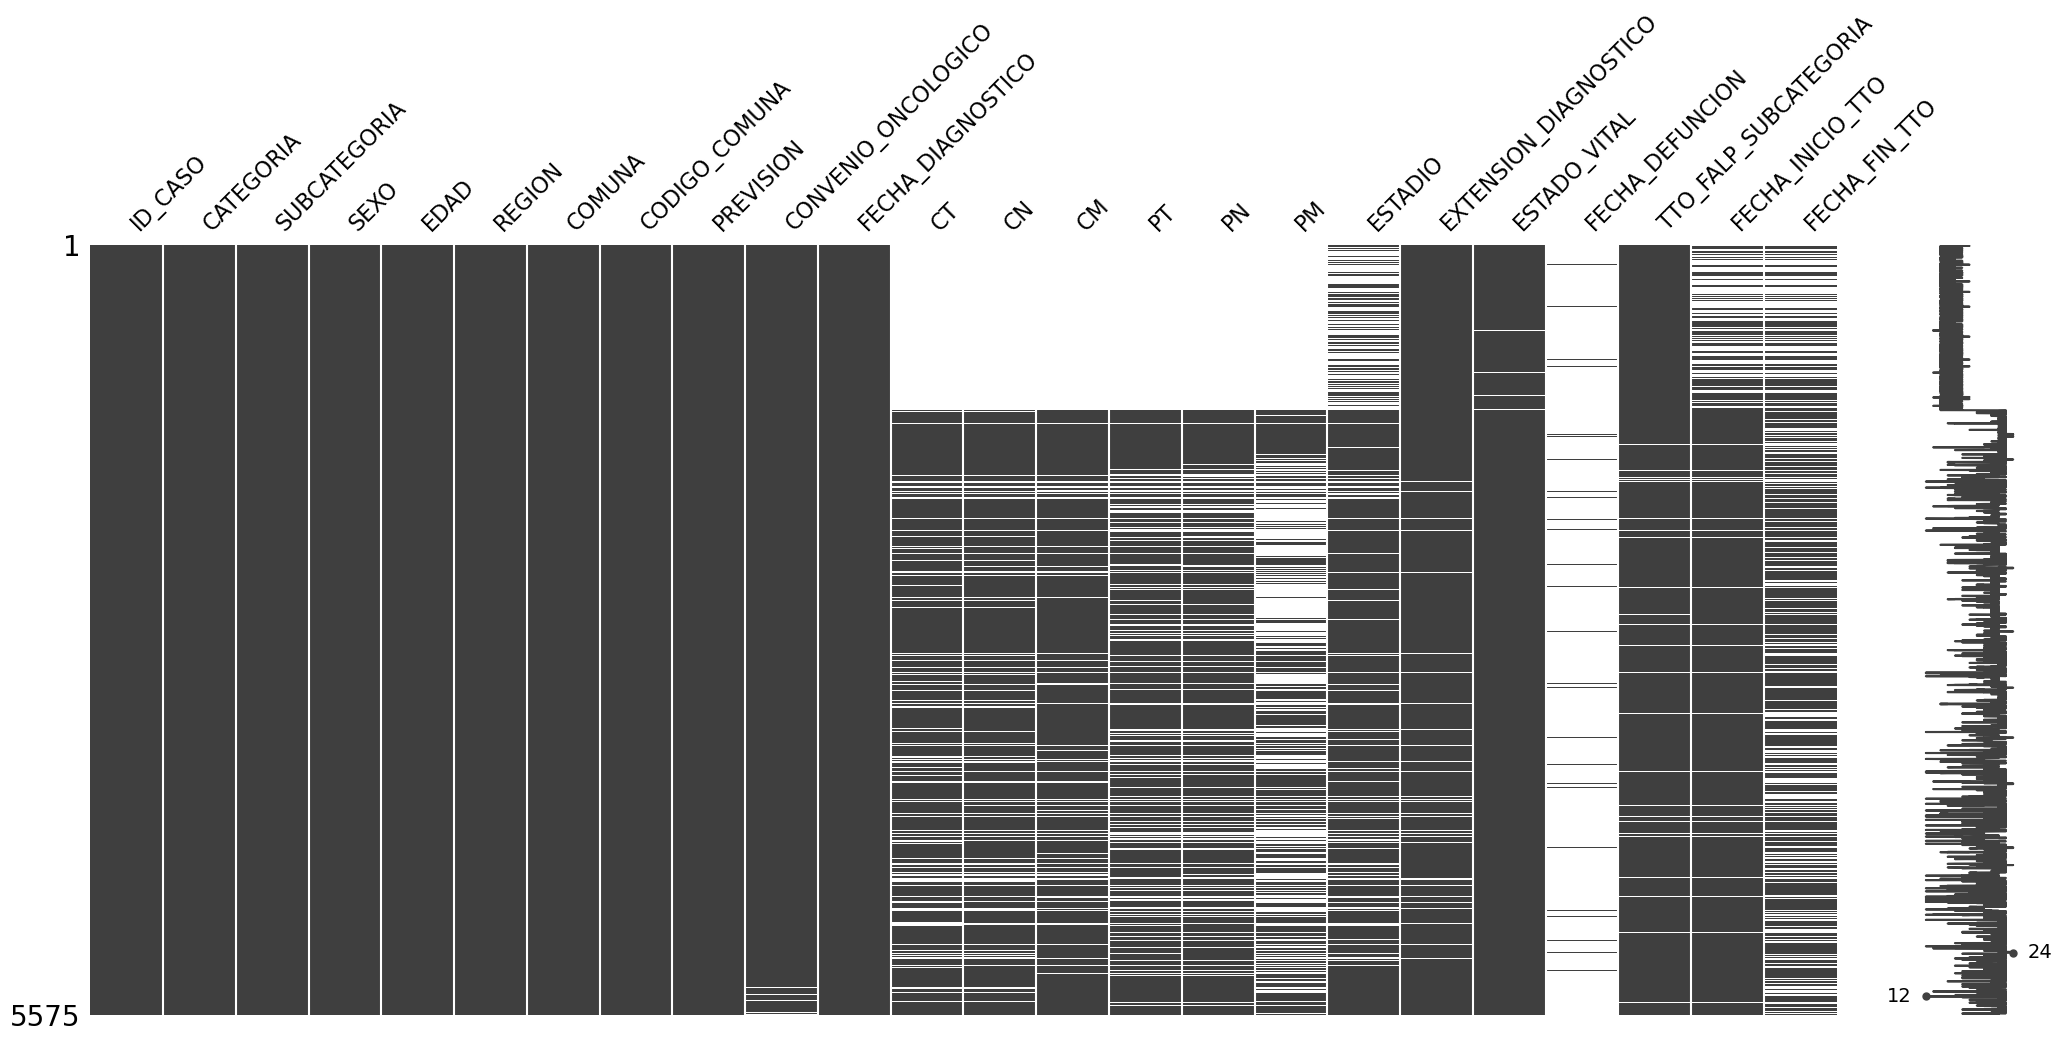

In [7]:
import missingno as msno
msno.matrix(mama)

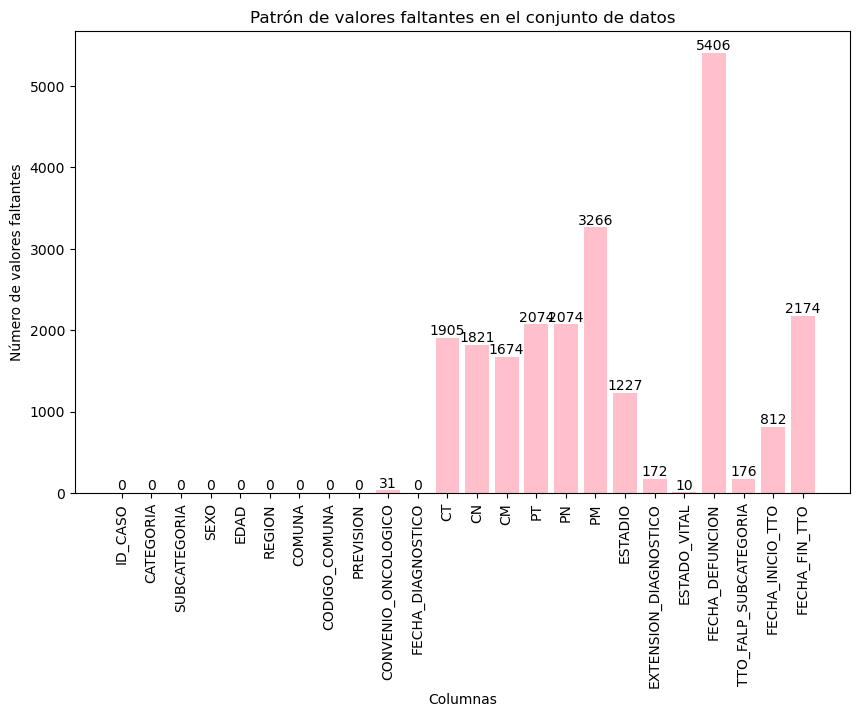

In [8]:
# Calcular el número de valores perdidos por columna
missing_counts = mama.isnull().sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(missing_counts)), missing_counts, color='#FFC0CB')

# Personalizar el gráfico
plt.title("Patrón de valores faltantes en el conjunto de datos")
plt.xlabel("Columnas")
plt.ylabel("Número de valores faltantes")
plt.xticks(range(len(missing_counts)), mama.columns, rotation=90)

# Agregar el valor total en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

Se puede observar que el df cuenta con 5.575 filas, 24 columnas de las cuales 3 contienen datos de tipo int64 y 21 de tipo object.
También resaltar que existen 14 variables que presentan valores nulos.

In [9]:
mama.describe()

,ID_CASO,EDAD,CODIGO_COMUNA
count,5575.000000,5575.000000,5575.000000
mean,10653.015067,57.250762,10705.172197
std,6354.304465,12.839822,3792.122781
min,1.000000,25.000000,-1.000000
25%,4727.000000,48.000000,7304.000000
50%,11728.000000,57.000000,13113.000000
75%,16352.500000,66.000000,13122.000000
max,22793.000000,97.000000,16304.000000


## 3.2 Visualización de datos
Generámos gráficos para poder explorar de mejor forma los patrones y las relaciones de la data.

In [10]:
def plot_variables_nulls(df):
    num_cols = df.select_dtypes(include=["float", "int"]).columns
    cat_cols = df.select_dtypes(include=["object"]).columns

    # Gráficos para variables numéricas
    for col in num_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=col, kde=True, fill=None, edgecolor='black')
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

    # Gráficos para variables categóricas
    for col in cat_cols:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=col, palette=["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4"])
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

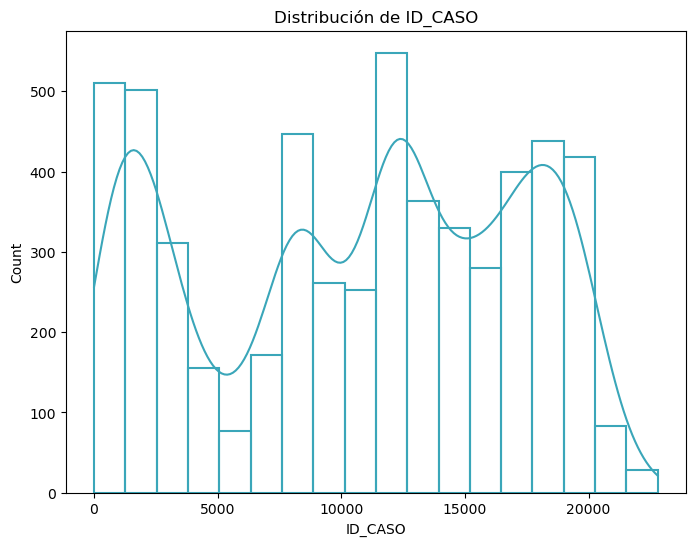

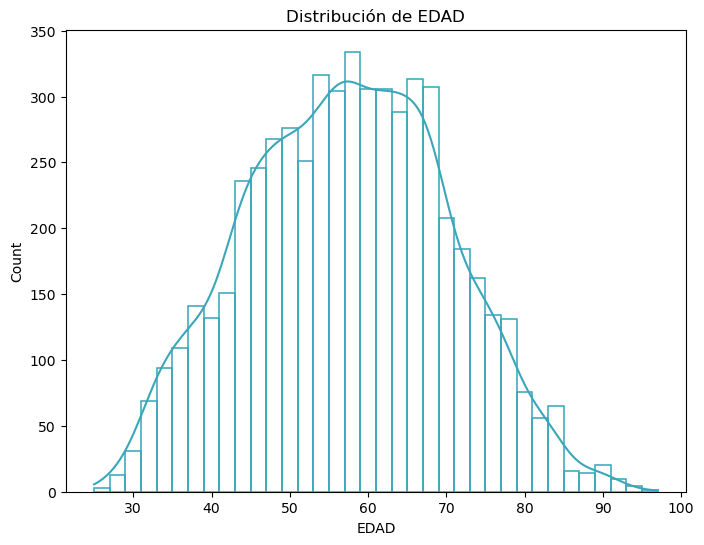

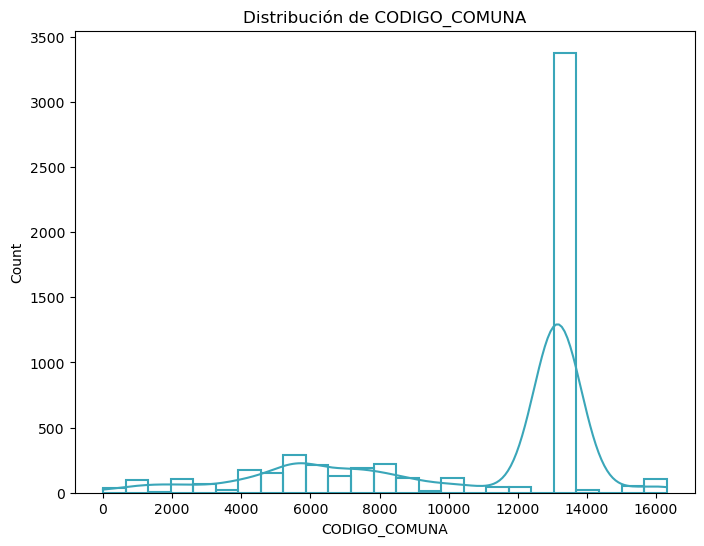

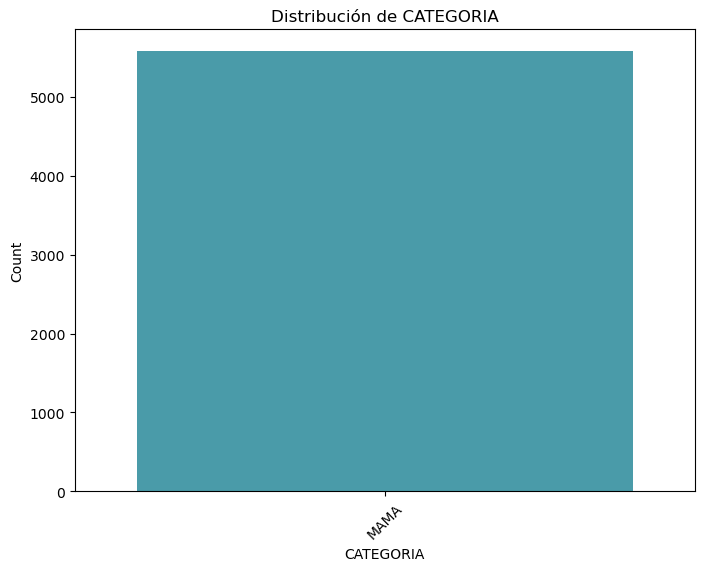

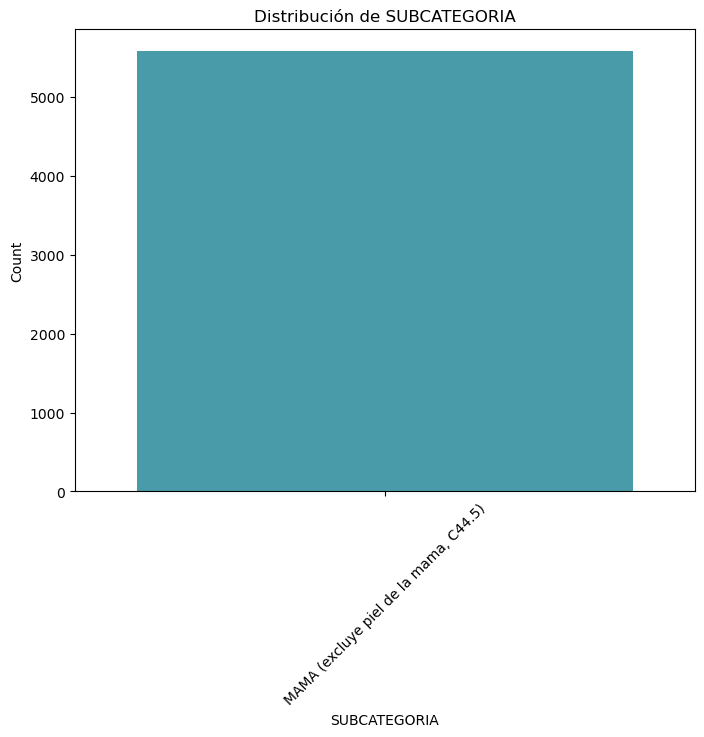

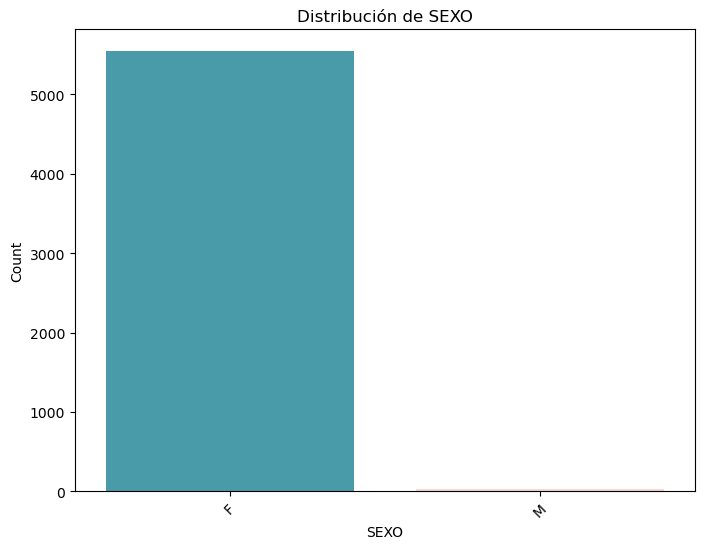

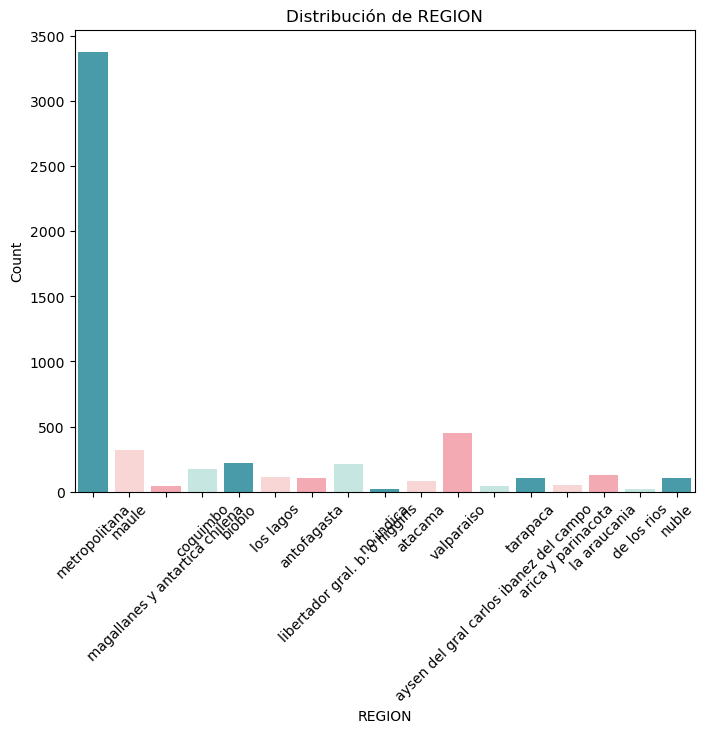

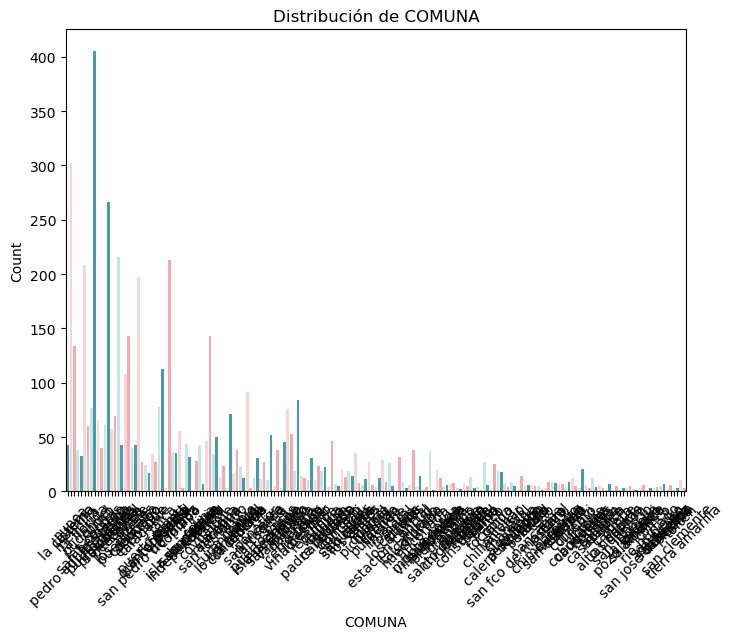

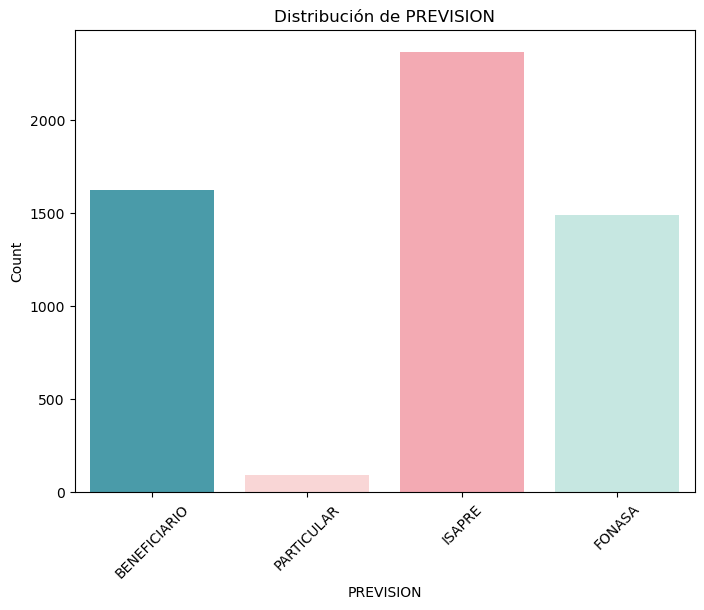

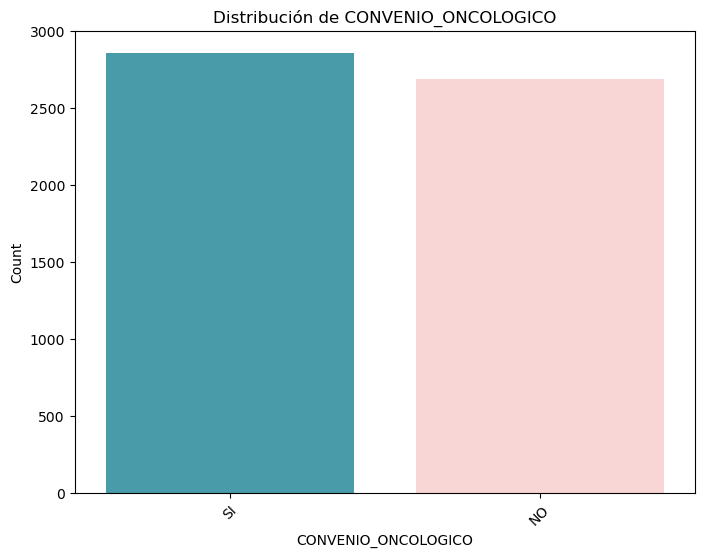

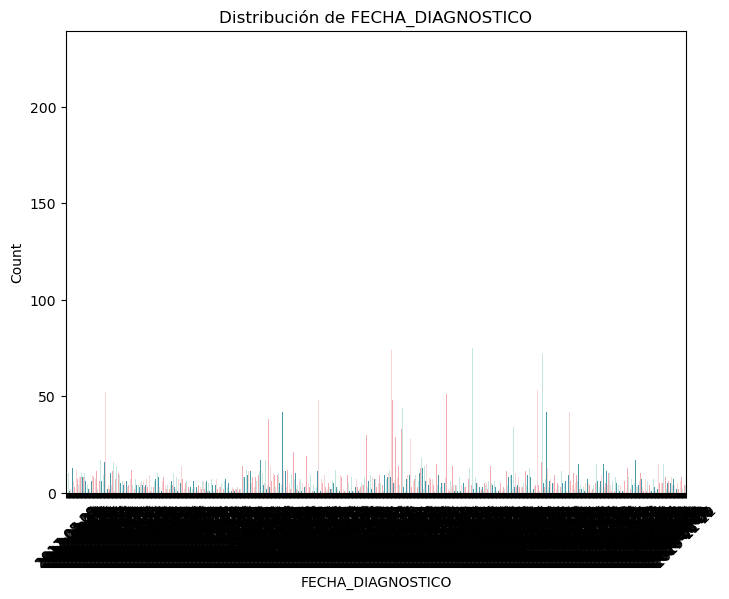

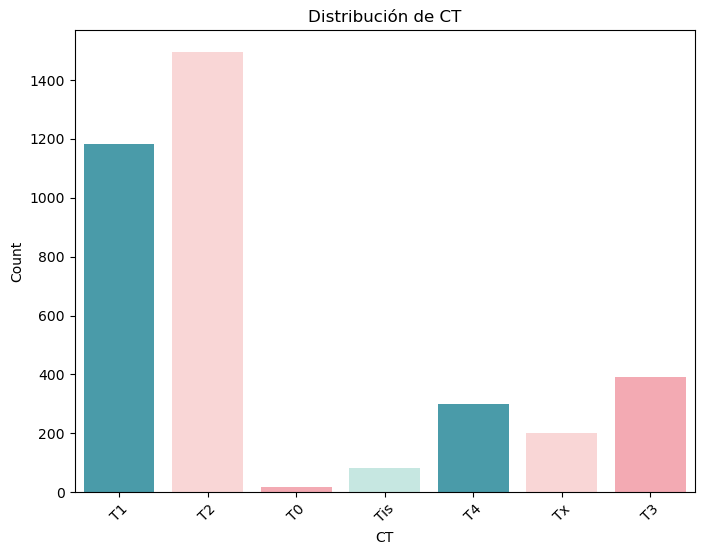

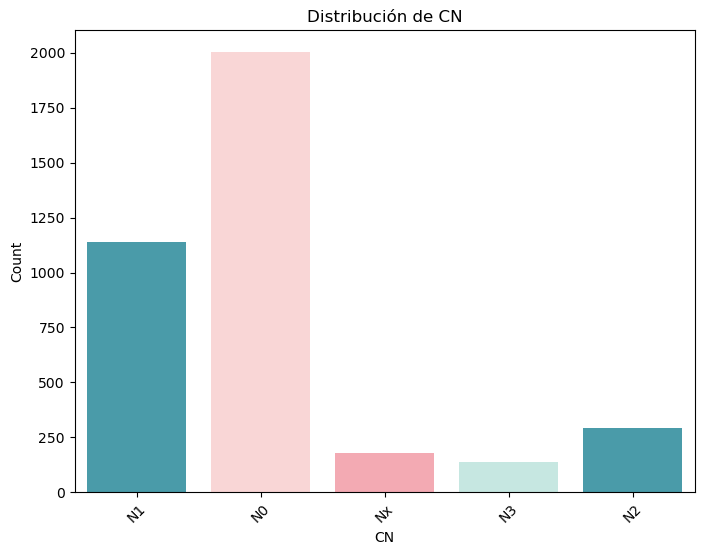

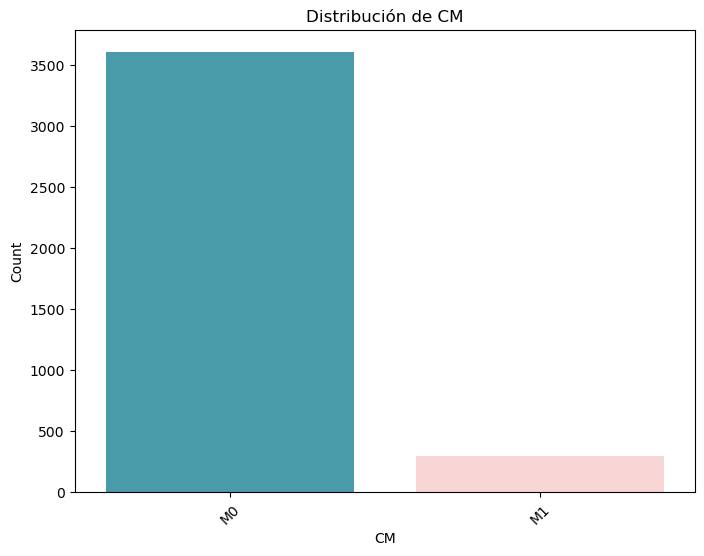

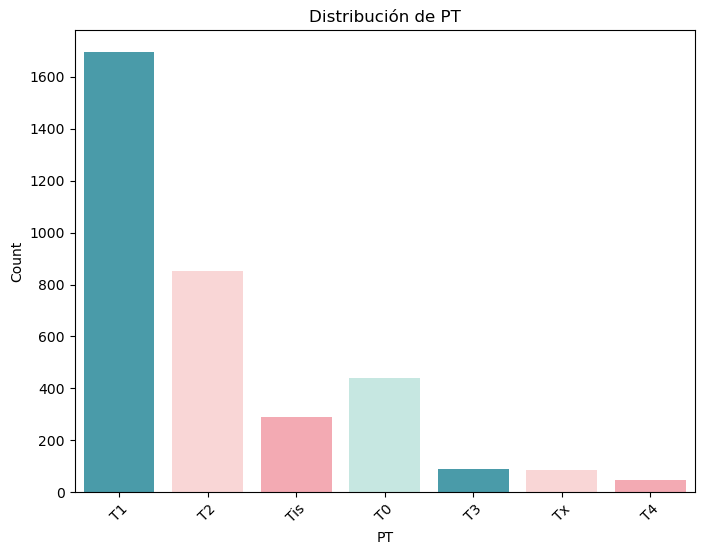

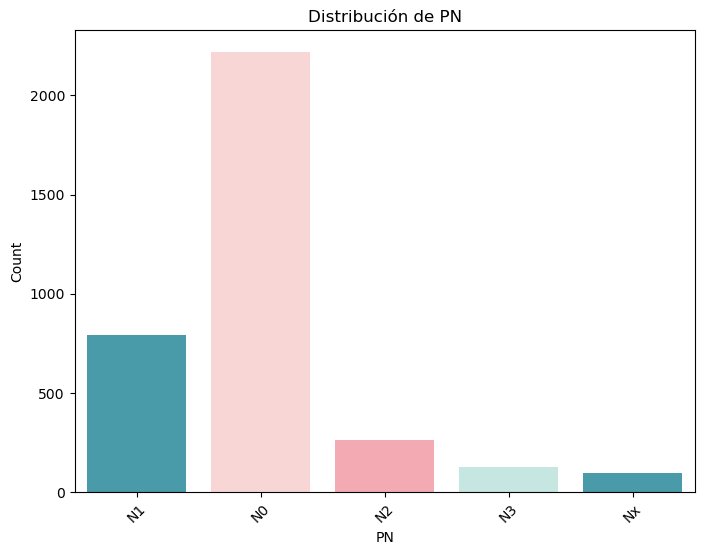

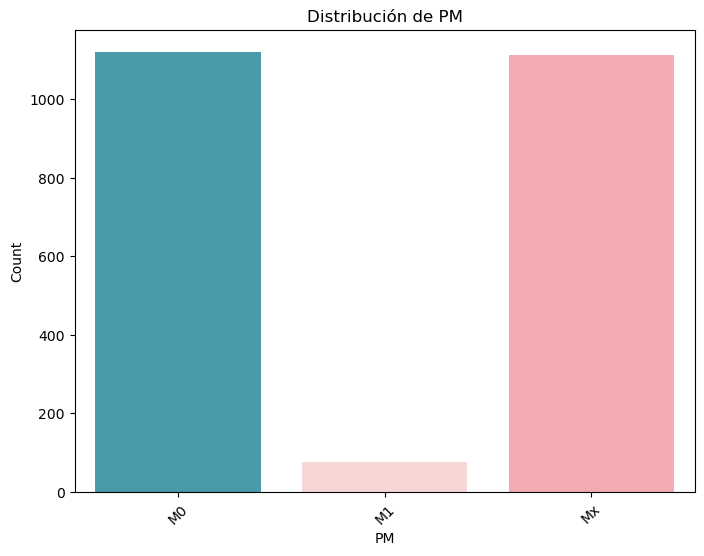

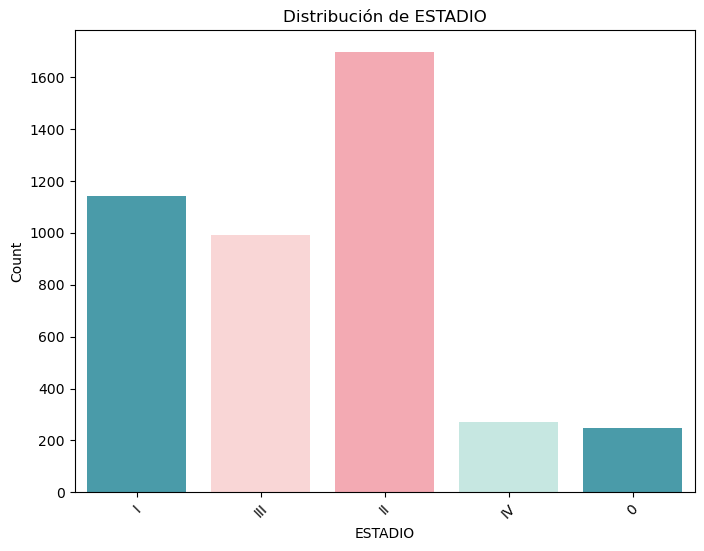

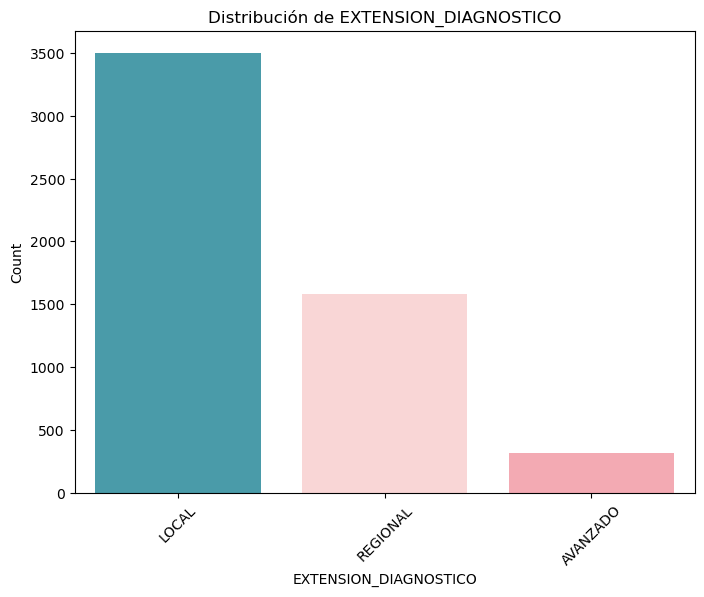

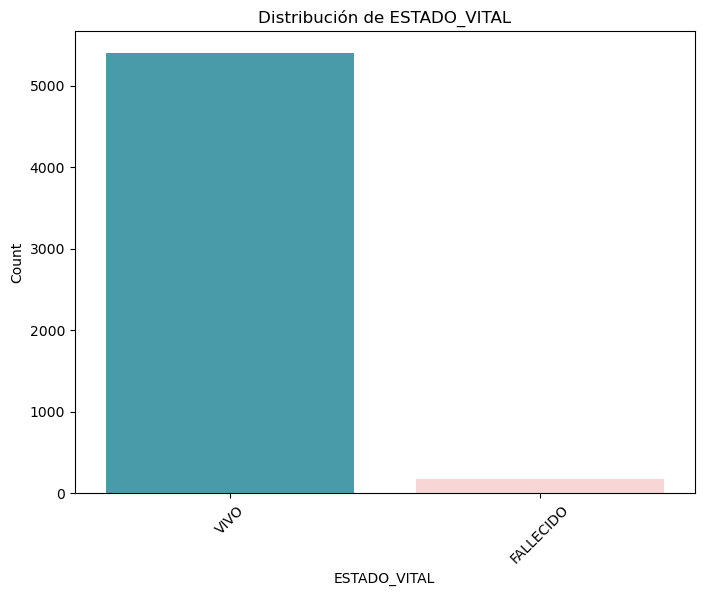

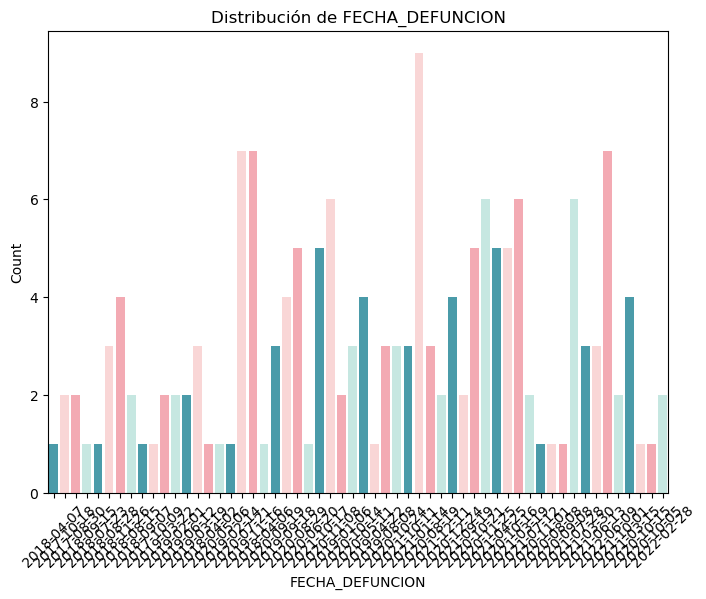

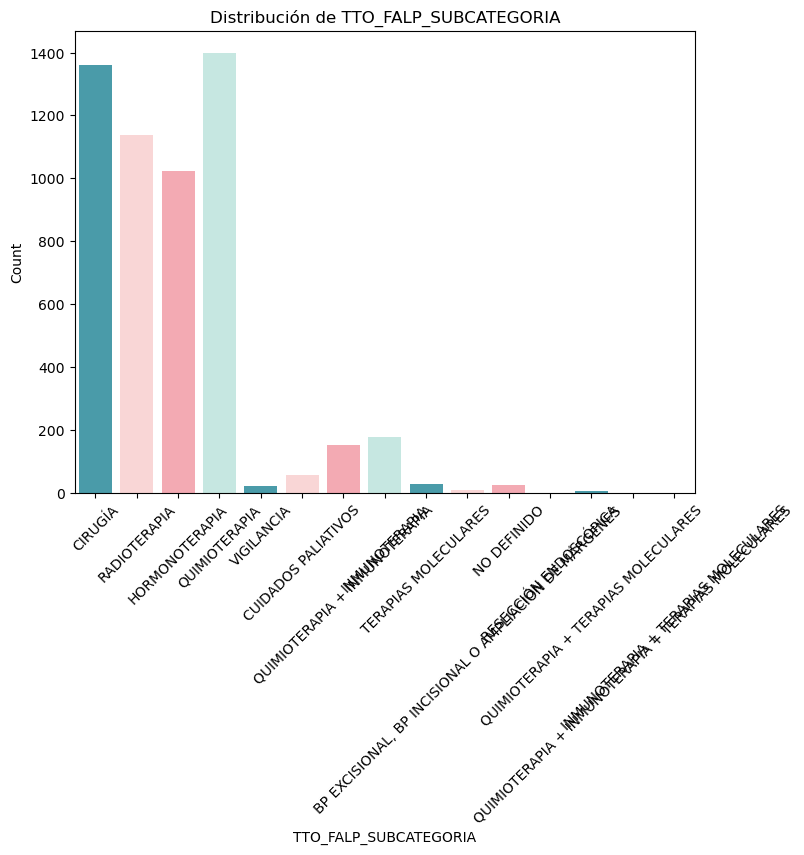

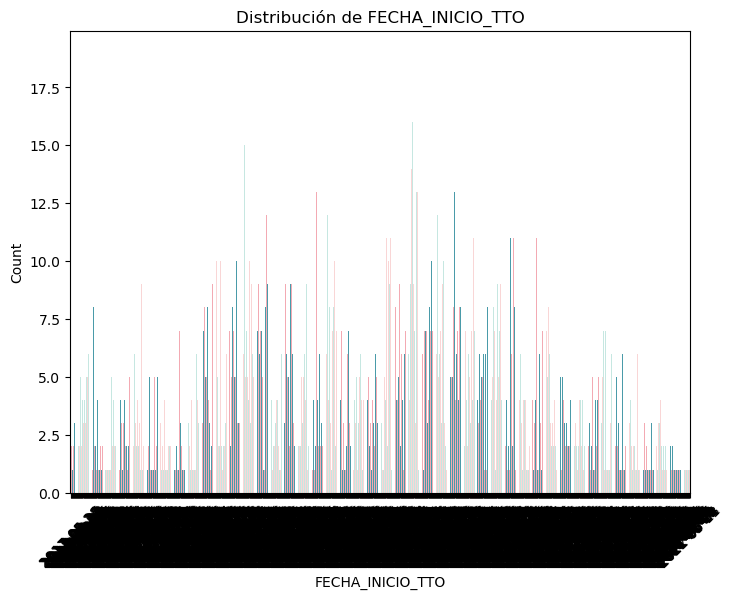

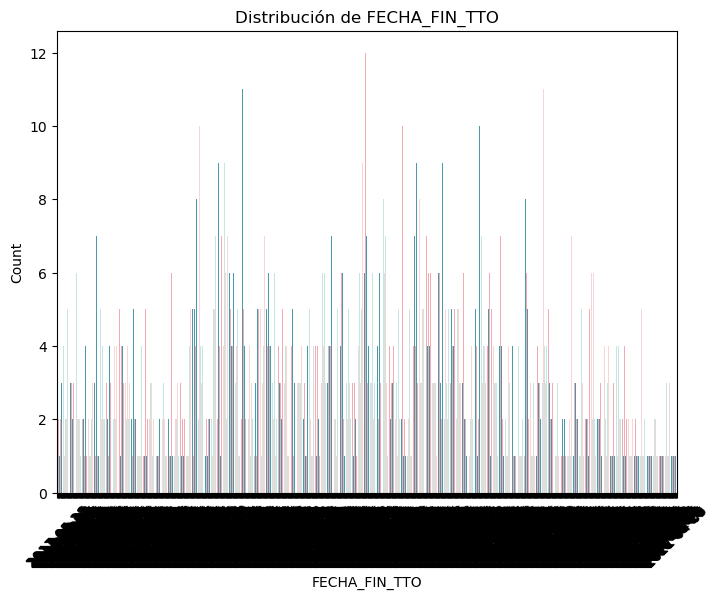

In [11]:
plot_variables_nulls(mama)

### Vector Objetivo
En el caso de nuestro VO, el ESTADIO, se observa que es de tipo object y que la mayor concentración de este se encuentra en el Estadio II con un 30.4%, seguido por el Estadio I con un 20.5%, el Estadio III con un 17.8% y por último el IV con sólo un 4.8% presente en la muestra. También se logra observar una gran cantidad de valores faltantes (22.0%) y un % correspondiente a "0" (4.4%).
Debido a que nuestro modelo busca predecir esta variable, se decide eliminar del modelo, todas las filas que carezcan de un valor en esta columna.

In [12]:
def plot_estadios_mama(mama):
    estadios_contados = mama["ESTADIO"].fillna("Nulos").value_counts(dropna=False)  # Reemplazar NaN por "Nulos"

    # Definir la paleta de colores
    palette = ["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4", "#94D6E7", "#FFB1B3", "#FF6F7D", "#F5E1E3"]  # Agregar 6 colores
    
    plt.figure(figsize=(8, 6))
    plt.pie(estadios_contados, labels=estadios_contados.index, autopct="%1.1f%%", colors=palette)
    plt.title("Distribución de Estadios")
    plt.axis("equal")
    plt.show()

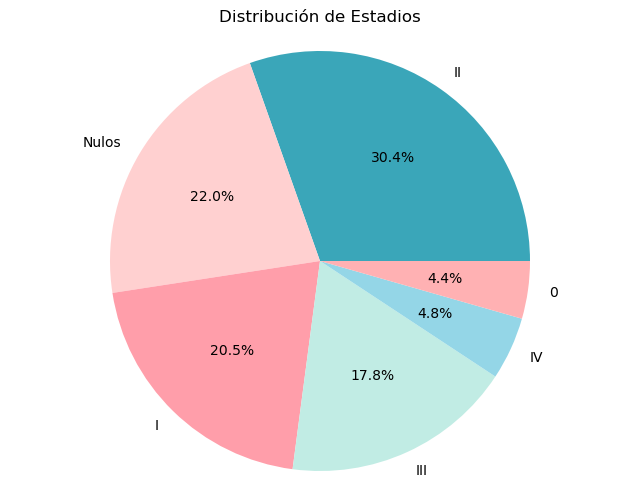

In [13]:
plot_estadios_mama(mama)

### Variables Independientes

La base de datos presenta 23 variables independientes, de las cúales 3 son de tipo int64 y 20 object. También se visualizaron las siguientes particularidades:

- Las variables CATEGORIA y SUBCATEGORIA presentan el mismo valor, es decir, ambas nos indican que el tipo de cáncer es mamario. Debido a que decidimos acotar el proyecto sólamente a este tipo de cáncer, se considera como información redundante por lo que se evalua su eliminación del modelo.

- Esto también pasa con los campos CODIGO_COMUNA y COMUNA, por lo que se evalúa eliminar el campo CODIGO_COMUNA ya que no nos aporta nada a nuestro df.

- La variable ID_CASO no nos aporta ninguna información relevante aparte de orden de los casos.

- Las variables correspondientes a fechas ("FECHA_DIAGNOSTICO", "FECHA_DEFUNCION", "FECHA_INICIO_TTO", "FECHA_FIN_TTO") no contemplaban relación al Estadio de los pacientes (ya que un paciente puede haberse tardado en tener su diagnóstico o puede haber muerto por otra causa que no sea cáncer) por lo que podrían encuciar el modelo.

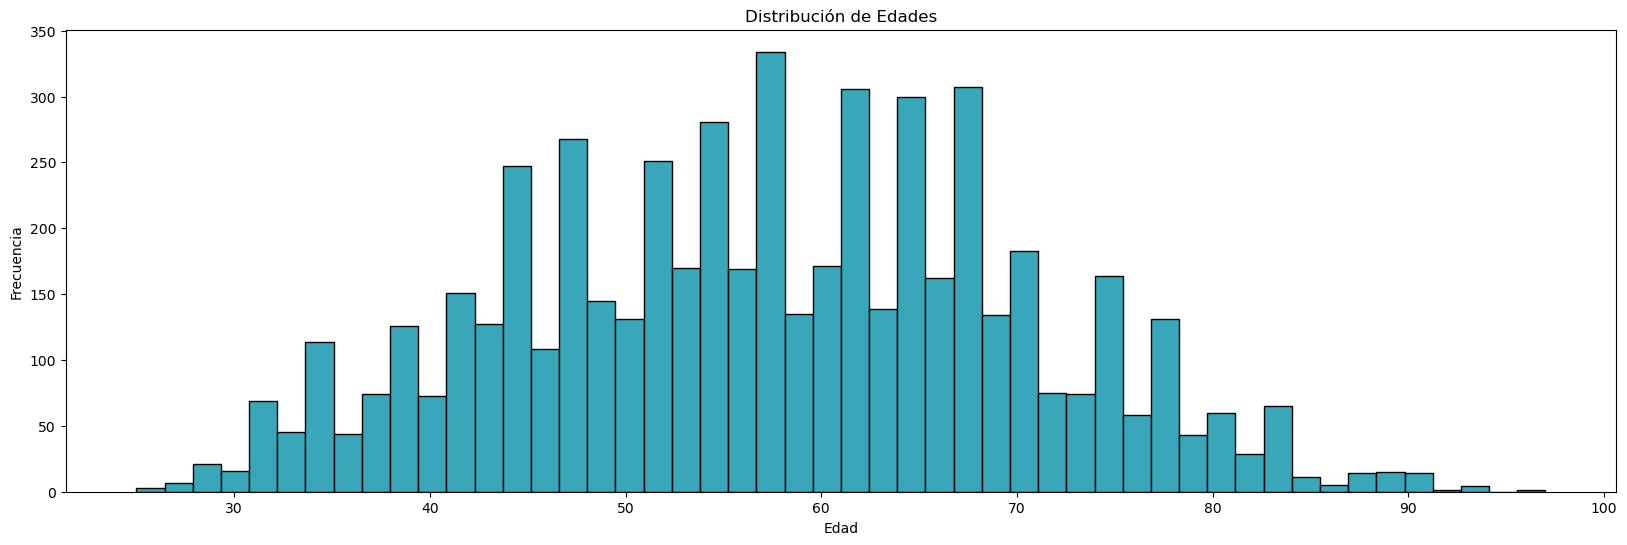

In [14]:
edades = mama["EDAD"]
plt.hist(edades, bins=50, edgecolor="black")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de Edades")
plt.show()

In [15]:
mama["EDAD"].describe()

count    5575.000000
mean       57.250762
std        12.839822
min        25.000000
25%        48.000000
50%        57.000000
75%        66.000000
max        97.000000
Name: EDAD, dtype: float64

Respecto a la variable edad, se puede observar que no presenta valores nulos para ninguna fila, su moda es de 57 años existiendo una concentración entre los 48 y 66 años en el df. El individuo más joven a analizar tiene 25 años mientras el más longevo tiene 97 años. 
Con el objetivo de reudcir la granularidad de los datos, poder resumirlos de mejot forma y facilitar su comparación y análisis es que se decide recodificar esta variable en "Grupos Etarios".

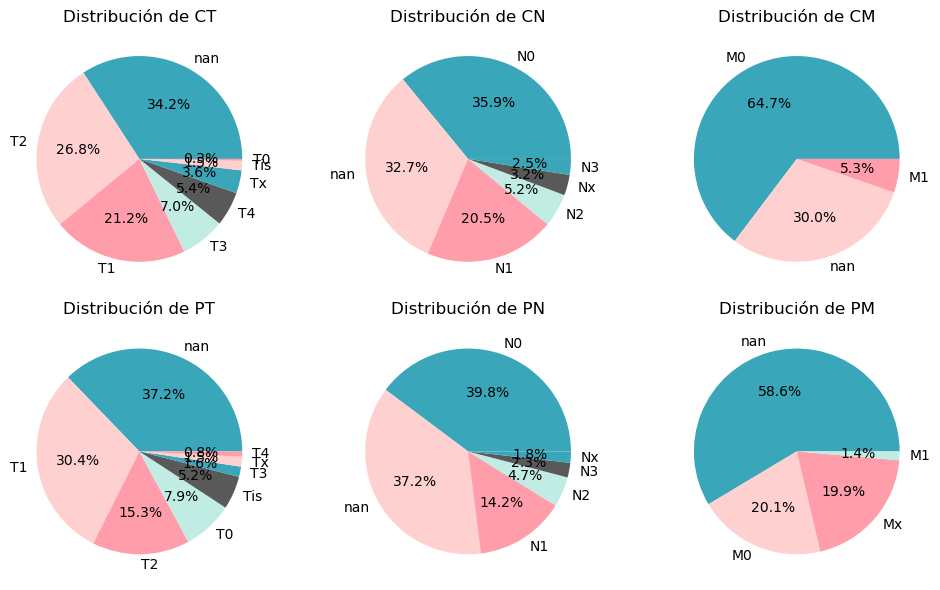

In [16]:
fx.grafico_VPYT(mama)

In [17]:
def grafico_VPYT(mama):
    variables_PYT = ["CT", "CN", "CM", "PT", "PN", "PM"]
    nombres = [
        "Distribución de CT: Descripción clínica del tamaño del tumor",
        "Distribución de CN: Descripción clínica si el tumor ha alcanzado ganglios linfáticos",
        "Distribución de CM: Descripción clínica si el cáncer hizo metástasis",
        "Distribución de PT: Descripción patológica del tamaño del tumor",
        "Distribución de PN: Descripción patológica si el tumor ha alcanzado ganglios linfáticos",
        "Distribución de PM: Descripción patológica si el cáncer hizo metástasis"
    ]
    num_variables = len(variables_PYT)
    num_columnas = 1

    fig, axes = plt.subplots(num_variables, num_columnas, figsize=(10, 8*num_variables))

    colores = ["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4", "#94D6E7", "#FFB1B3", "#FF6F7D", "#F5E1E3"]

    for i, variable in enumerate(variables_PYT):
        # Cuenta la frecuencia de cada categoría, incluyendo los valores perdidos
        frecuencia = mama[variable].value_counts(dropna=False)

        # Crea el gráfico de torta en el subgráfico correspondiente
        axes[i].pie(frecuencia.values, labels=frecuencia.index, autopct="%1.1f%%", pctdistance=0.85, labeldistance=1.1, colors=colores)
        
        # Asigna el título personalizado
        if i < len(nombres):
            axes[i].set_title(nombres[i])
        else:
            axes[i].set_title(f"Distribución de {variable}")

    # Ajusta los espacios entre subgráficos
    plt.tight_layout()

    # Muestra los gráficos
    plt.show()

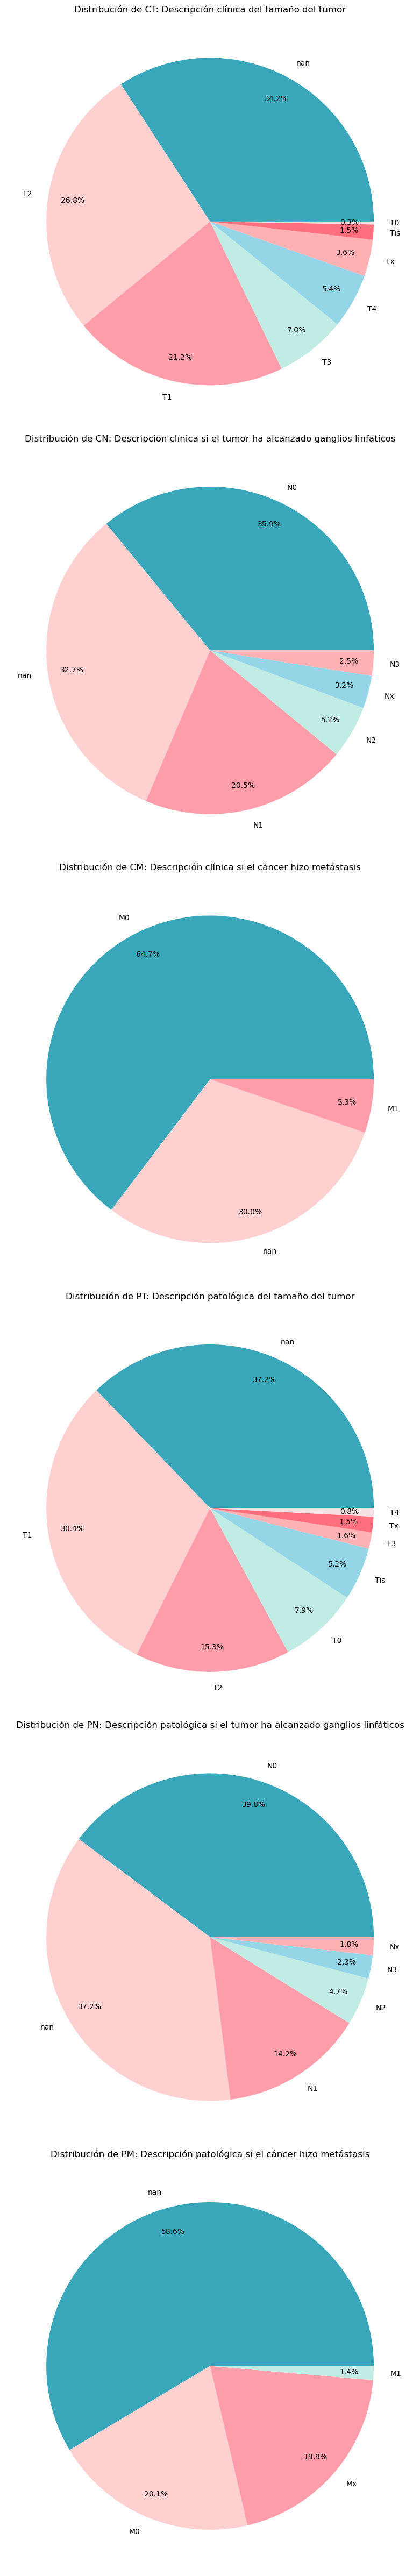

In [18]:
grafico_VPYT(mama)

In [19]:
def grafico_VPYT(mama):
    variables_PYT = ["CT", "CN", "CM", "PT", "PN", "PM"]
    nombres = [
        "Distribución de CT: Descripción clínica del tamaño del tumor",
        "Distribución de CN: Descripción clínica si el tumor ha alcanzado ganglios linfáticos",
        "Distribución de CM: Descripción clínica si el cáncer hizo metástasis",
        "Distribución de PT: Descripción patológica del tamaño del tumor",
        "Distribución de PN: Descripción patológica si el tumor ha alcanzado ganglios linfáticos",
        "Distribución de PM: Descripción patológica si el cáncer hizo metástasis"
    ]
    num_variables = len(variables_PYT)
    num_columnas = 1

    fig, axes = plt.subplots(num_variables, num_columnas, figsize=(10, 8*num_variables))

    colores = ["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4", "#94D6E7", "#FFB1B3", "#FF6F7D", "#F5E1E3"]

    for i, variable in enumerate(variables_PYT):
        # Reemplaza los valores NaN por "Nulos"
        frecuencia = mama[variable].fillna("Nulos").value_counts()

        # Crea el gráfico de torta en el subgráfico correspondiente
        axes[i].pie(frecuencia.values, labels=frecuencia.index, autopct="%1.1f%%", pctdistance=0.85, labeldistance=1.1, colors=colores)
        
        # Asigna el título personalizado
        if i < len(nombres):
            axes[i].set_title(nombres[i])
        else:
            axes[i].set_title(f"Distribución de {variable}")

    # Ajusta los espacios entre subgráficos
    plt.tight_layout()

    # Muestra los gráficos
    plt.show()

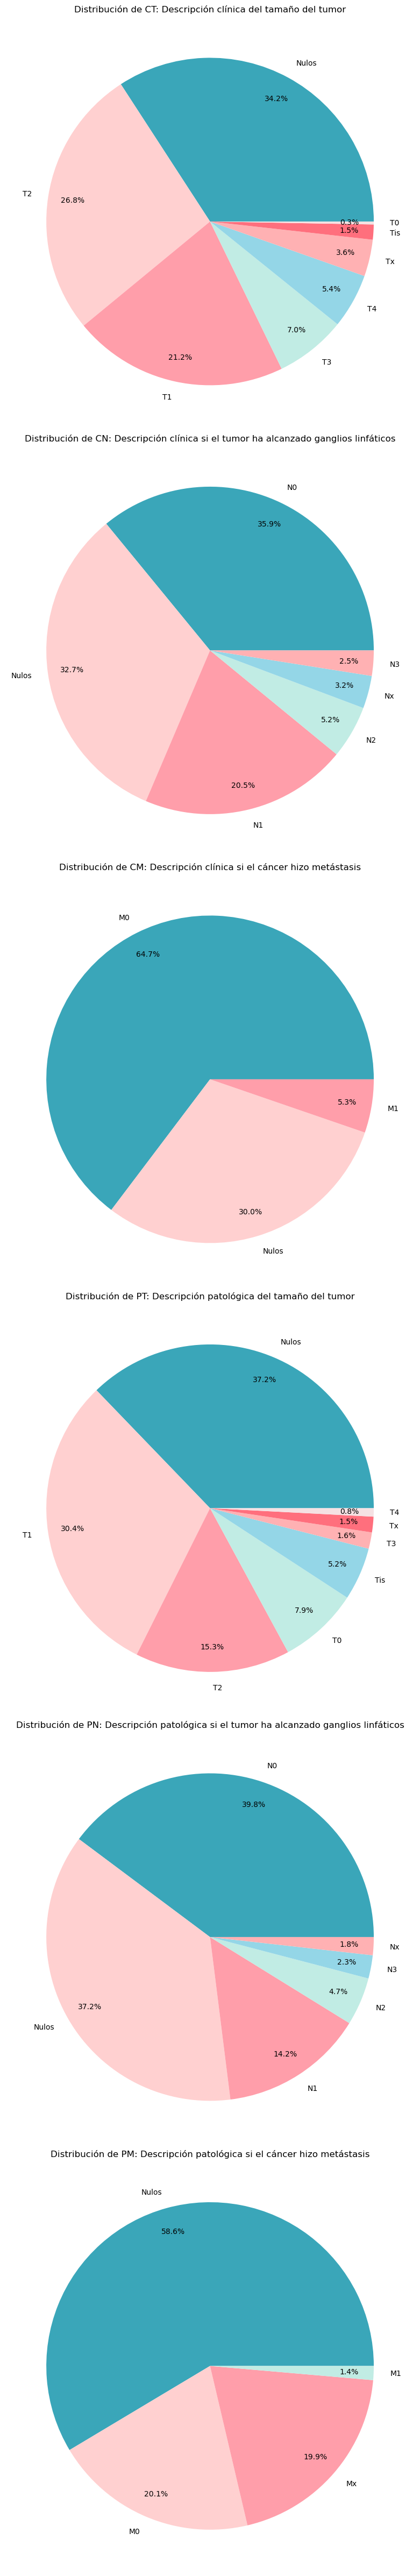

In [20]:
grafico_VPYT(mama)

Por último, respecto a la distribucion de las variables patológicas y clínicas, podemos observar una gran precencia de valores faltantes en todas estas. Sin embargo, como comentamos anteriormente, es posible que una persona no se realice alguno estos exámentes y obtenga su estadío, como así también la implicancia de que cada uno de los resultados de estas variables influya en el diagnóstico del paciente.

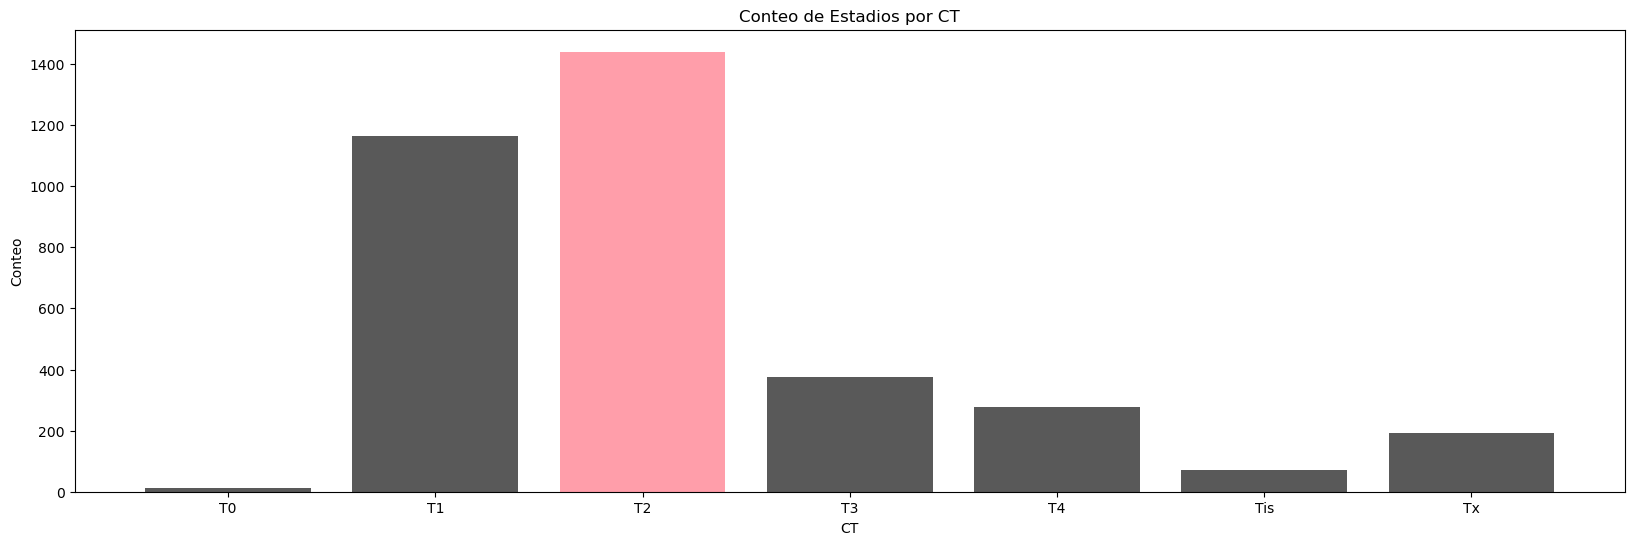

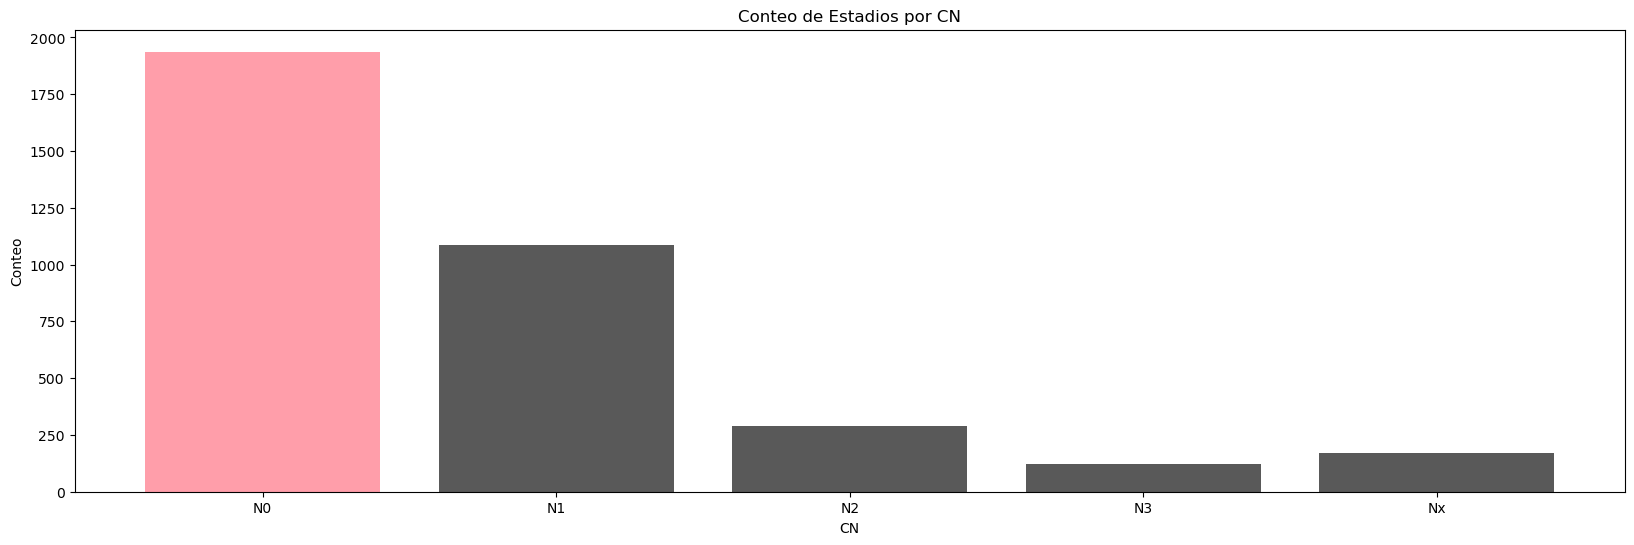

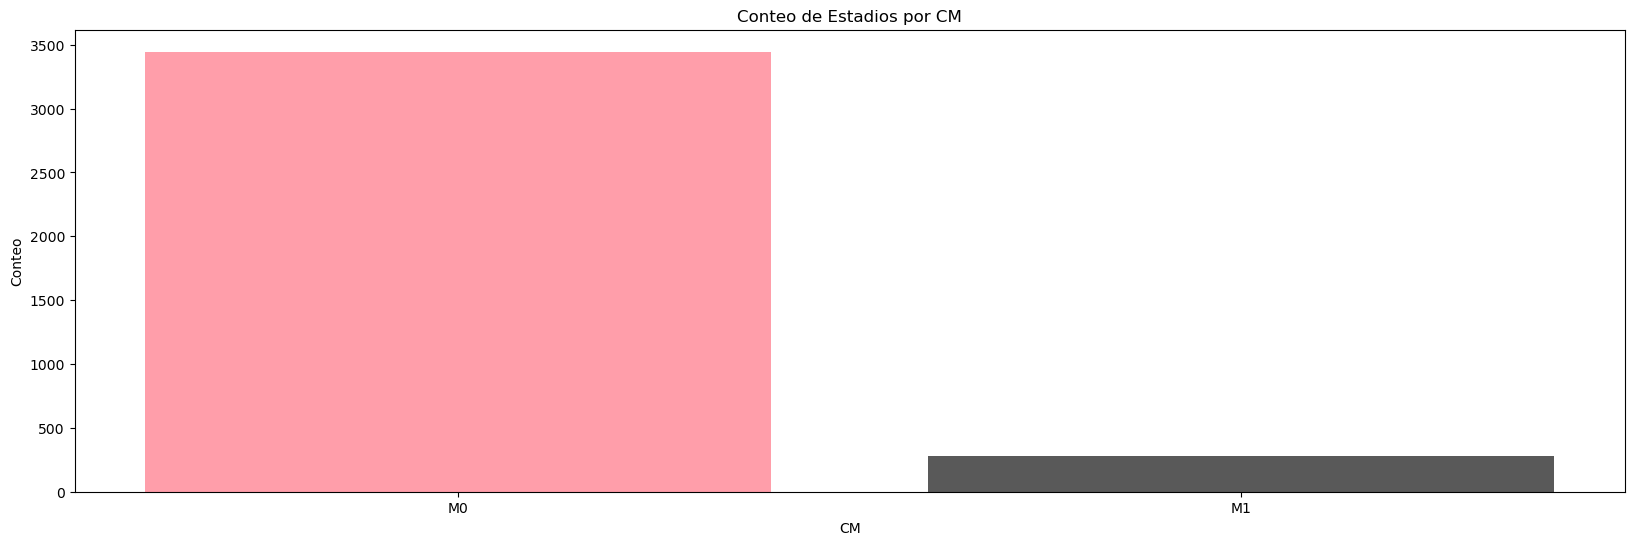

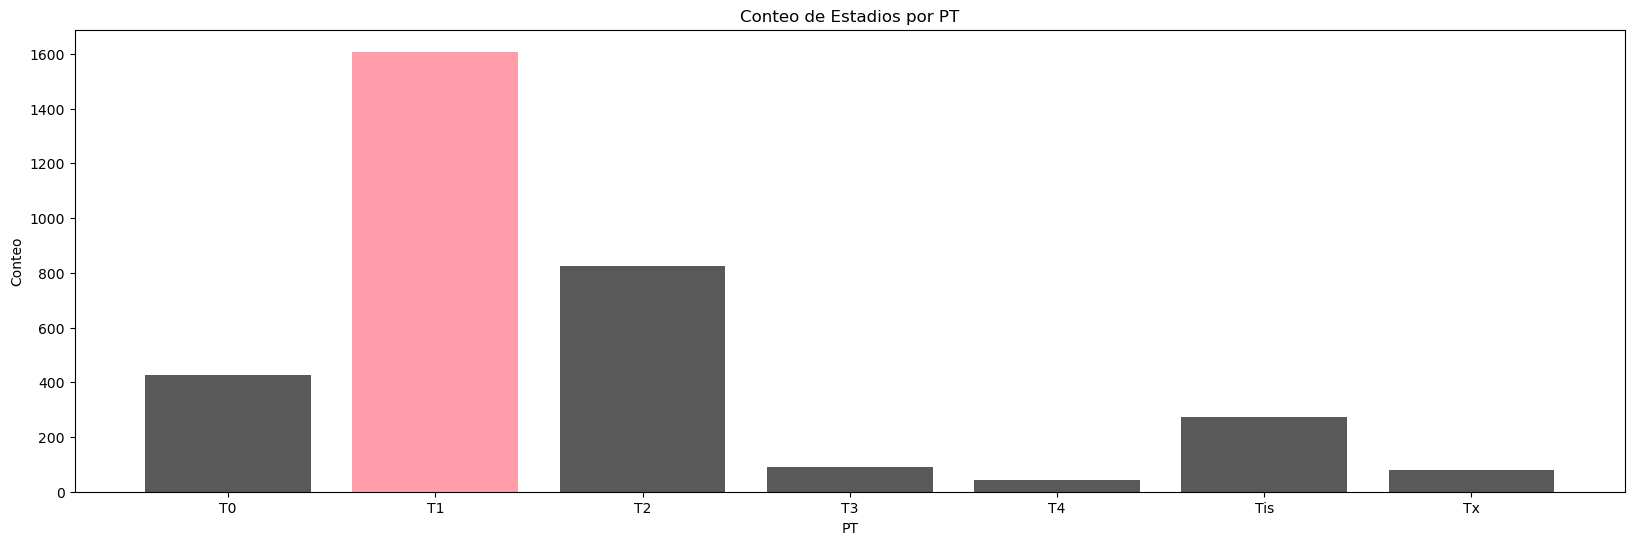

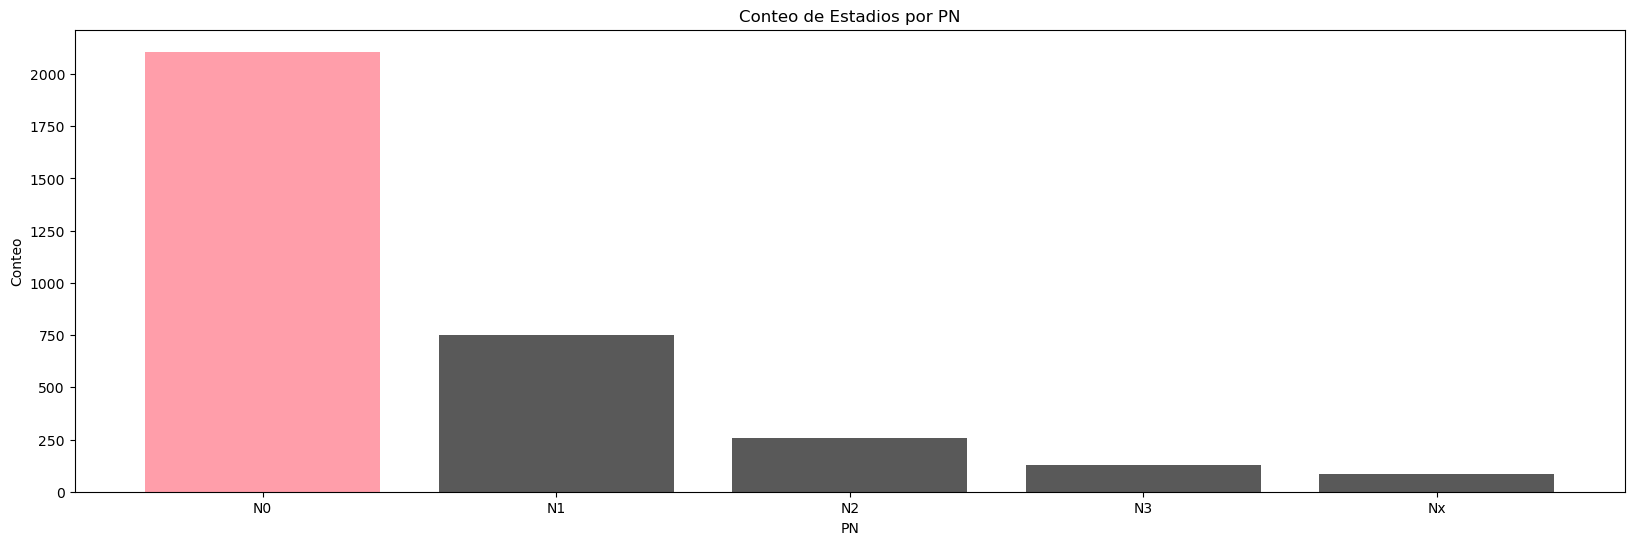

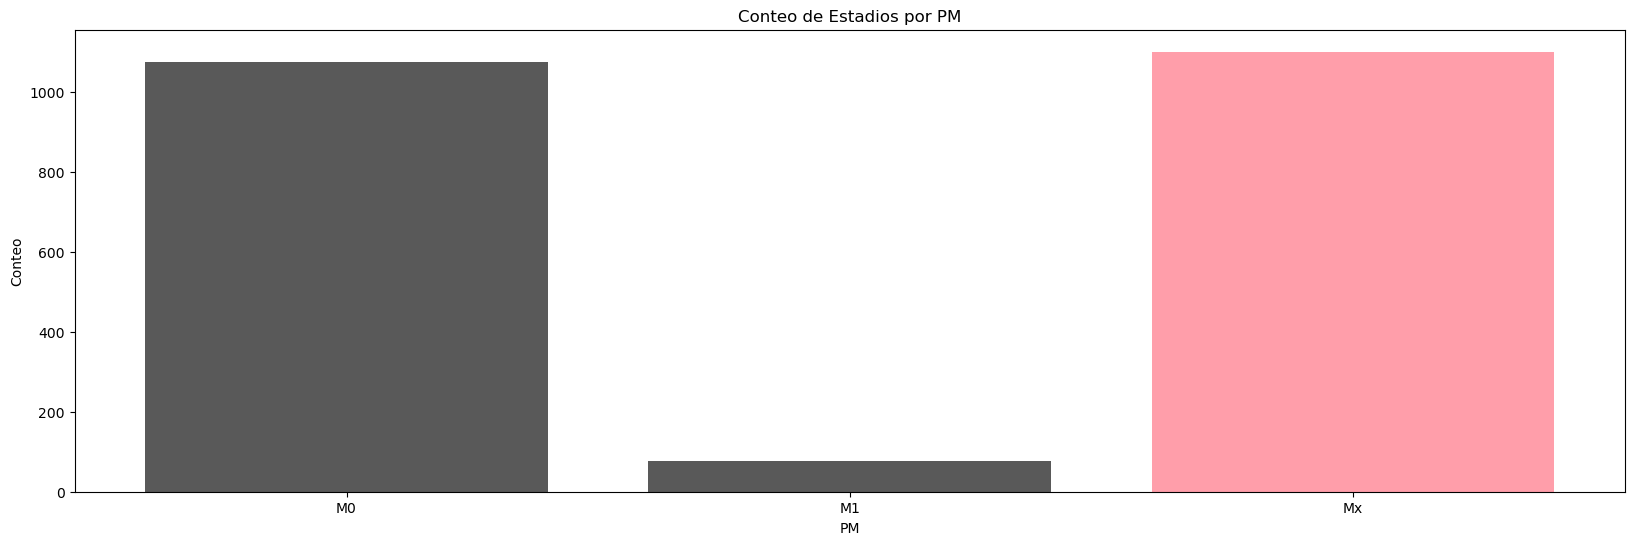

In [21]:
df_filtered = mama[["CT", "CN", "CM", "PT", "PN", "PM", "ESTADIO"]]

# Crear un gráfico de barras para cada variable categórica versus "ESTADIO"
for variable in ["CT", "CN", "CM", "PT", "PN", "PM"]:
    # Calcular el conteo de cada categoría en la variable
    counts = df_filtered.groupby(variable)["ESTADIO"].count()

    # Encontrar la categoría con mayor conteo
    max_count_category = counts.idxmax()

    # Crear el gráfico de barras
    plt.bar(counts.index, counts.values, color="#595959")
    plt.bar(max_count_category, counts[max_count_category], color="#FF9EAA")
    plt.xlabel(variable)
    plt.ylabel("Conteo")
    plt.title(f"Conteo de Estadios por {variable}")
    plt.show()

NameError: name 'extension_contada' is not defined

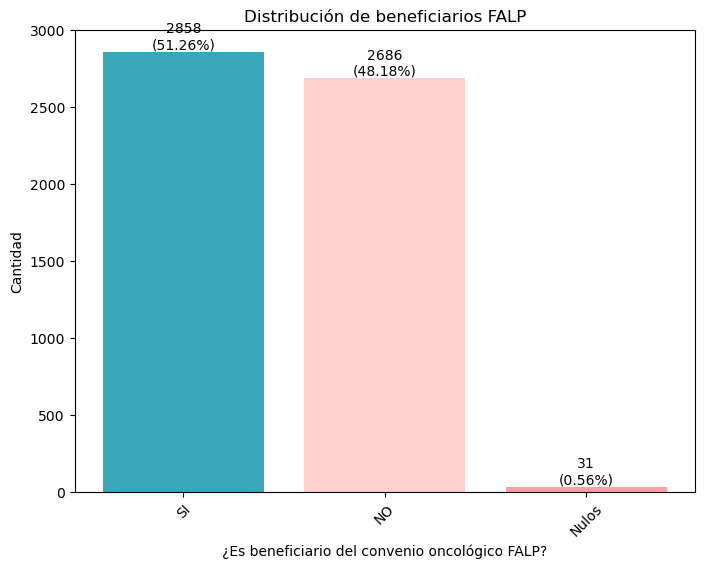

In [22]:
total_registros = len(mama["CONVENIO_ONCOLOGICO"])
convenio_contado = mama["CONVENIO_ONCOLOGICO"].fillna("Nulos").astype(str).value_counts(dropna=False)
porcentaje = convenio_contado / total_registros * 100

# Definir la paleta de colores
palette = ["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4", "#FFC700"]

plt.figure(figsize=(8, 6))
plt.bar(convenio_contado.index, convenio_contado, color=palette)
plt.title("Distribución de beneficiarios FALP")
plt.xlabel("¿Es beneficiario del convenio oncológico FALP?")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)

for i, v in enumerate(convenio_contado):
    percent = porcentaje[i]
    plt.text(i, v, f"{v}\n({percent:.2f}%)", ha="center", va="bottom")

# Ajustar límite superior del eje y
plt.ylim(top=max(extension_contada) * 0.9)

plt.show()

In [ ]:
total_registros = len(mama["SEXO"])
sexo_contado = mama["SEXO"].astype(str).value_counts(dropna=False)
porcentaje = sexo_contado / total_registros * 100

# Definir la paleta de colores
palette = ["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4", "#FFC700"]

plt.figure(figsize=(8, 6))
plt.bar(sexo_contado.index, sexo_contado, color=palette)
plt.title("Distribución de sexo")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)

for i, v in enumerate(sexo_contado):
    percent = porcentaje[i]
    plt.text(i, v, f"{v}\n({percent:.2f}%)", ha="center", va="bottom")

# Ajustar límite superior del eje y
plt.ylim(top=max(sexo_contado) * 1.1)

plt.show()

In [ ]:
total_registros = len(mama["PREVISION"])
prevision_contada = mama["PREVISION"].astype(str).value_counts(dropna=False)
porcentaje = prevision_contada / total_registros * 100

# Definir la paleta de colores
palette = ["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4", "#FFC700"]

plt.figure(figsize=(8, 6))
plt.bar(prevision_contada.index, prevision_contada, color=palette)
plt.title("Distribución de previsión")
plt.xlabel("Previsión")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)

for i, v in enumerate(prevision_contada):
    percent = porcentaje[i]
    plt.text(i, v, f"{v}\n({percent:.2f}%)", ha="center", va="bottom")

# Ajustar límite superior del eje y
plt.ylim(top=max(prevision_contada) * 1.1)

plt.show()

Podemos observar que un 51.26% de los pacientes son beneficiarios de la FALP y que sólo un 0.56% no registra información en esta variable.

In [ ]:
total_registros = len(mama["EXTENSION_DIAGNOSTICO"])
extension_contada = mama["EXTENSION_DIAGNOSTICO"].fillna("Nulos").astype(str).value_counts(dropna=False)
porcentaje = extension_contada / total_registros * 100

# Definir la paleta de colores
palette = ["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4", "#FFC700"]

plt.figure(figsize=(8, 6))
plt.bar(extension_contada.index, extension_contada, color=palette)
plt.title("Distribución de la extensión del diagnóstico")
plt.xlabel("Extensión del diagnóstico")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)

for i, v in enumerate(extension_contada):
    percent = porcentaje[i]
    plt.text(i, v, f"{v}\n({percent:.2f}%)", ha="center", va="bottom")

# Ajustar límite superior del eje y
plt.ylim(top=max(extension_contada) * 1.1)

plt.show()

Se puede observar que la mayoría se encuentra en la categorización “Local”, es decir, el cáncer se encuentra sólamente en la mama. Como segunda opción más frecuente se observa que el cáncer ya ha comenzado a afectar a los ganglios linfáticos (“Regional”) y por último se encuentra el estado “Avanzado” en dónde se indica que el cáncer se encuentra en otras partes del cuerpo aparte de la mama.

In [ ]:
total_registros = len(mama["COMUNA"])
comunas_contadas = mama["COMUNA"].value_counts(dropna=False)
porcentaje = comunas_contadas / total_registros * 100

for index, count in comunas_contadas.iteritems():
    percent = porcentaje[index]
    print(f"{index}: {count} ({percent:.2f}%)")

porcentaje_nulos = comunas_contadas[None] / total_registros * 100
print(f"Nulos: {comunas_contadas[None]} ({porcentaje_nulos:.2f}%)")

In [ ]:
total_registros = len(mama["TTO_FALP_SUBCATEGORIA"])
tto_contado = mama["TTO_FALP_SUBCATEGORIA"].value_counts(dropna=False)
porcentaje = tto_contado / total_registros * 100

for index, count in tto_contado.iteritems():
    percent = porcentaje[index]
    print(f"{index}: {count} ({percent:.2f}%)")

porcentaje_nulos = tto_contado[None] / total_registros * 100
print(f"Nulos: {tto_contado[None]} ({porcentaje_nulos:.2f}%)")

# **4. Preprocesamiento de datos**

Para el preprocesamiento de la base de datos se siguieron los siguientes pasos:

0. Se eliminaron las filas que carecieran de un valor en la columna "ESTADIO". Los registros eliminados
fueron guardados en una variable, ya que fueron utilizados como dataset de validacion externo. El
preprocesamiento siguio con los registros que SI tuvieran un valor en al columna "ESTADIO"

1. Se eliminaron las columnas **["CATEGORIA", "SUBCATEGORIA", "CODIGO_COMUNA", "ID_CASO"]**

2. Se creo la columna "RANGO_ETARIO", que contiene la categorizacion de la columna "EDAD" en
distintos estratos (explicitos en la funcion). Posteriormente, se elimino la columna "EDAD"

3. Se dejaron solamente las filas que tuvieran al menos 1 examen patologico/clinico (al menos 1 registro
en las columnas **["CT", "CN", "CM", "PT", "PN", "PM"]**)

4. Se eliminaron todas las columnas referentes a las fechas (**["FECHA_DIAGNOSTICO", "FECHA_DEFUNCION", "FECHA_INICIO_TTO", "FECHA_FIN_TTO"]**)

5. Se creo el vector objetivo "STATUS" a partir de la columna "ESTADIO" (la codificacion esta
explicita en la funcion). Posteriormente, se elimino la columna "ESTADIO"

6. Se rellenaron todos los valores faltantes del dataframe con el valor "SO" (Sin Observacion)

7. Finalmente, todas las variables categoricas fueron llevadas a variables indicadoras (dummies)

Todos los pasos del preprocesamiento (exceptuando el paso 0 y 7) fueron modularizados en una unica funcion (```preprocesar_dataset_cancer_mama```) en el archivo auxiliar funciones.py.

In [23]:
# Deja solo los registros con estadio
mama_con_estadio = mama[~mama["ESTADIO"].isna()]

# Deja solo los registros sin estadio
mama_sin_estadio = mama[mama["ESTADIO"].isna()]


In [24]:
mama_preproc = fx.preprocesar_dataset_cancer_mama(mama_con_estadio)


In [25]:
X = mama_preproc.drop(columns=["STATUS"])
y = mama_preproc["STATUS"]


X, encoder_training = fx.obtener_vars_indicadoras(X)


# **5. Análisis Exploratorio Post Procesamiento**


## 5.1 Exploración de la base de datos
Examinar la estructura de la base de datos, sus columnas y el tipo de información luego de su preprocesamiento con el objetivo de comprender la organización de estos.

In [ ]:
mama_preproc.head()
# acá exploramos de qué manera están estructurados los datos

In [ ]:
import missingno as msno
msno.matrix(mama_preproc)

In [ ]:
# Calcular el número de valores perdidos por columna
missing_counts = mama_preproc.isnull().sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(missing_counts)), missing_counts, color='#FFC0CB')

# Personalizar el gráfico
plt.title("Patrón de valores faltantes post procesamiento de datos")
plt.xlabel("Columnas")
plt.ylabel("Número de valores faltantes")

# Ajustar los nombres de las columnas o reducir su longitud
column_names = [col[:10] + '...' if len(col) > 10 else col for col in mama_preproc.columns]

# Establecer los nombres de las columnas en el gráfico
plt.xticks(range(len(missing_counts)), column_names, rotation=45, ha='right')

# Agregar el valor total en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Establecer el límite inferior del eje y en 0
plt.ylim(0, max(missing_counts))

plt.tight_layout()
plt.show()

In [ ]:
mama_preproc.info()
# Obtenemos la descripción general de las columnas, los tipos de datos y la cantidad de valores no nulos cada columna.

## revisar si existe algún paciente que tenga"no definido" y algo más"

In [ ]:
mama_preproc.describe()
# Por último obtenemos estadísticas descriptivas de las columnas numéricas


Se puede observar que la moda se encuentra en el STADIO 2, que la mayoría de las persona si cuenta con seguro oncológico e ISAPRE y que estas habitan principalmente en Las Condes, RM

## 5.2 Visualización de datos
Generámos gráficos para poder explorar de mejor forma los patrones y las relaciones de la data.

In [ ]:
plot_variables_nulls(mama_preproc)

In [ ]:
mama_preproc["SEXO"].value_counts()

In [ ]:
total_registros = len(mama_preproc["EXTENSION_DIAGNOSTICO"])
extension_contada = mama_preproc["EXTENSION_DIAGNOSTICO"].astype(str).value_counts(dropna=False)
porcentaje = extension_contada / total_registros * 100

# Definir la paleta de colores
palette = ["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4", "#FFC700"]

plt.figure(figsize=(8, 6))
plt.bar(extension_contada.index, extension_contada, color=palette)
plt.title("Distribución de EXTENSION_DIAGNOSTICO")
plt.xlabel("Extensión Diagnostico")
plt.ylabel("Recuento")
plt.xticks(rotation=45)

for i, v in enumerate(extension_contada):
    percent = porcentaje[i]
    plt.text(i, v, f"{v}\n({percent:.2f}%)", ha="center", va="bottom")

# Ajustar límite superior del eje y
plt.ylim(top=max(extension_contada) * 1.1)

plt.show()

In [ ]:
total_registros = len(mama_preproc["CONVENIO_ONCOLOGICO"])
convenio_contado = mama_preproc["CONVENIO_ONCOLOGICO"].fillna("Nulos").astype(str).value_counts(dropna=False)
porcentaje = convenio_contado / total_registros * 100

# Definir la paleta de colores
palette = ["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4", "#FFC700"]

plt.figure(figsize=(8, 6))
plt.bar(convenio_contado.index, convenio_contado, color=palette)
plt.title("Distribución de beneficiarios FALP")
plt.xlabel("¿Es beneficiario del convenio oncológico FALP?")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)

for i, v in enumerate(convenio_contado):
    percent = porcentaje[i]
    plt.text(i, v, f"{v}\n({percent:.2f}%)", ha="center", va="bottom")

# Ajustar límite superior del eje y
plt.ylim(top=max(extension_contada) * 0.25)

plt.show()

In [ ]:
total_registros = len(mama_preproc["PREVISION"])
prevision_contada = mama_preproc["PREVISION"].astype(str).value_counts(dropna=False)
porcentaje = prevision_contada / total_registros * 100

# Definir la paleta de colores
palette = ["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4", "#FFC700"]

plt.figure(figsize=(8, 6))
plt.bar(prevision_contada.index, prevision_contada, color=palette)
plt.title("Distribución de previsión")
plt.xlabel("Previsión")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)

for i, v in enumerate(prevision_contada):
    percent = porcentaje[i]
    plt.text(i, v, f"{v}\n({percent:.2f}%)", ha="center", va="bottom")

# Ajustar límite superior del eje y
plt.ylim(top=max(prevision_contada) * 1.1)

plt.show()

In [ ]:
total_registros = len(mama_preproc["RANGO_ETARIO"])
rango_etario_contado = mama_preproc["RANGO_ETARIO"].astype(str).value_counts(dropna=False)
porcentaje = rango_etario_contado / total_registros * 100

# Definir la paleta de colores
palette = ["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4", "#FFC700"]

plt.figure(figsize=(8, 6))
plt.bar(rango_etario_contado.index, rango_etario_contado, color=palette)
plt.title("Distribución de rango etario")
plt.xlabel("Rango etario")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)

for i, v in enumerate(rango_etario_contado):
    percent = porcentaje[i]
    plt.text(i, v, f"{v}\n({percent:.2f}%)", ha="center", va="bottom")

# Ajustar límite superior del eje y
plt.ylim(top=max(rango_etario_contado) * 1.1)

plt.show()

In [ ]:
def plot_estadios_mama(mama_preproc):
    estadios_contados = mama_preproc["STATUS"].value_counts(dropna=False)  # Incluir valores nulos

    # Definir la paleta de colores
    palette = ["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4", "#FFC700", "#7D3C98"]  # Agregar 6 colores
    
    plt.figure(figsize=(8, 6))
    plt.pie(estadios_contados, labels=estadios_contados.index, autopct="%1.1f%%", colors=palette)
    plt.title("Distribución de Estadios Reclasificados")
    plt.axis("equal")
    plt.show()

plot_estadios_mama(mama_preproc)

In [ ]:
total_registros = len(mama_preproc["STATUS"])
status_contado = mama_preproc["STATUS"].value_counts(dropna=False)
porcentaje = status_contado / total_registros * 100

for index, count in status_contado.iteritems():
    percent = porcentaje[index]
    print(f"{index}: {count} ({percent:.2f}%)")

if None in status_contado.index:
    porcentaje_nulos = status_contado[None] / total_registros * 100
    print(f"Nulos: {status_contado[None]} ({porcentaje_nulos:.2f}%)")
else:
    print("No se encontraron valores nulos.")

In [ ]:
def grafico_VPYT2(mama_preproc):
    variables_PYT = ["CT", "CN", "CM", "PT", "PN", "PM"]
    nombres = [
        "Distribución de CT: Descripción clínica del tamaño del tumor",
        "Distribución de CN: Descripción clínica si el tumor ha alcanzado ganglios linfáticos",
        "Distribución de CM: Descripción clínica si el cáncer hizo metástasis",
        "Distribución de PT: Descripción patológica del tamaño del tumor",
        "Distribución de PN: Descripción patológica si el tumor ha alcanzado ganglios linfáticos",
        "Distribución de PM: Descripción patológica si el cáncer hizo metástasis"
    ]
    num_variables = len(variables_PYT)
    num_filas = num_variables // 2  # Número de filas para mostrar 2 gráficos por fila
    num_columnas = 2  # 2 gráficos por fila

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(12, 5*num_filas))

    colores = ["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4", "#94D6E7", "#FFB1B3", "#FF6F7D", "#F5E1E3"]

    for i, variable in enumerate(variables_PYT):
        fila = i // num_columnas
        columna = i % num_columnas

        # Reemplaza los valores NaN por "Nulos"
        frecuencia = mama[variable].fillna("Nulos").value_counts()

        # Crea el gráfico de torta en el subgráfico correspondiente
        axes[fila, columna].pie(frecuencia.values, labels=frecuencia.index, autopct="%1.1f%%", pctdistance=0.85, labeldistance=1.1, colors=colores)
        
        # Asigna el título personalizado
        if i < len(nombres):
            axes[fila, columna].set_title(nombres[i])
        else:
            axes[fila, columna].set_title(f"Distribución de {variable}")

    # Ajusta los espacios entre subgráficos
    plt.tight_layout()

    # Muestra los gráficos
    plt.show()

In [ ]:
grafico_VPYT2(mama_preproc)

In [ ]:
grafico_VPYT(mama_preproc)

## 5.3 Análisis de correlación
Realizamos este análisis para evaluar el comportamiento entre las variables.

In [ ]:
correlation_matrix = mama.corr()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

## 5.4 Análisis de características
Examinamos la importancia de las características en relación con la variable objetivo.

PREVISION     CONVENIO_ONCOLOGICO
BENEFICIARIO  NO                     2.112069
              NO DEFINIDO            2.500000
              SI                     1.700000
FONASA        NO                     1.997375
              NO DEFINIDO            1.500000
              SI                     1.800000
ISAPRE        NO                     1.658228
              NO DEFINIDO            1.750000
              SI                     1.664537
PARTICULAR    NO                     2.000000
              SI                     1.666667
Name: status_probability, dtype: float64


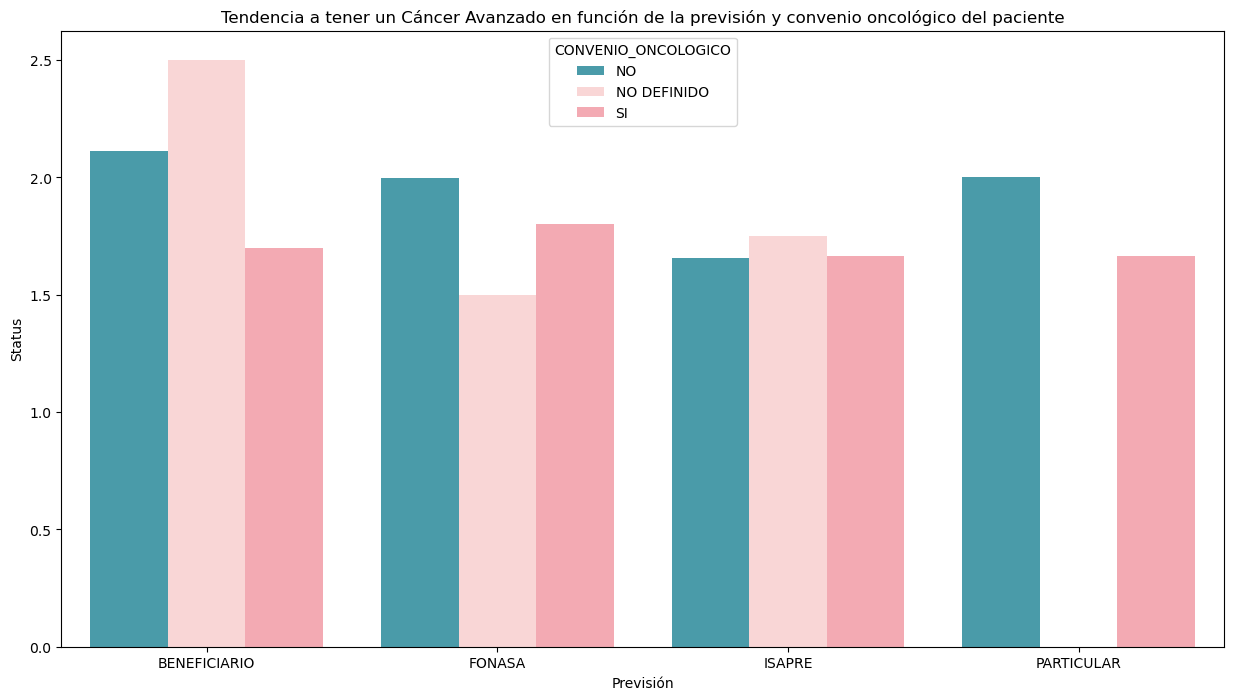

In [29]:
# agrupamos PREVISION Y CONVENIO_ONCOLOGICO en funcion de STATUS
grouped_data = mama_preproc.groupby(["PREVISION", "CONVENIO_ONCOLOGICO"]).agg(
    {"STATUS": ["count", "sum"]}
)

# Calcular la probabilidad de STATUS
grouped_data["status_probability"] = grouped_data["STATUS"]["sum"] / grouped_data["STATUS"]["count"]

# Mostrar los resultados
print(grouped_data["status_probability"])
long_data = grouped_data["status_probability"].reset_index()

# Creamos un gráfico de barras con Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(data=long_data, x="PREVISION", y="status_probability", hue="CONVENIO_ONCOLOGICO")

plt.title("Tendencia a tener un Cáncer Avanzado en función de la previsión y convenio oncológico del paciente")
plt.xlabel("Previsión")
plt.ylabel("Status")

# Mostrar el gráfico
plt.show()

PREVISION     CONVENIO_ONCOLOGICO
BENEFICIARIO  NO                     2.112069
              NO DEFINIDO            2.500000
              SI                     1.700000
FONASA        NO                     1.997375
              NO DEFINIDO            1.500000
              SI                     1.800000
ISAPRE        NO                     1.658228
              NO DEFINIDO            1.750000
              SI                     1.664537
PARTICULAR    NO                     2.000000
              SI                     1.666667
Name: status_probability, dtype: float64


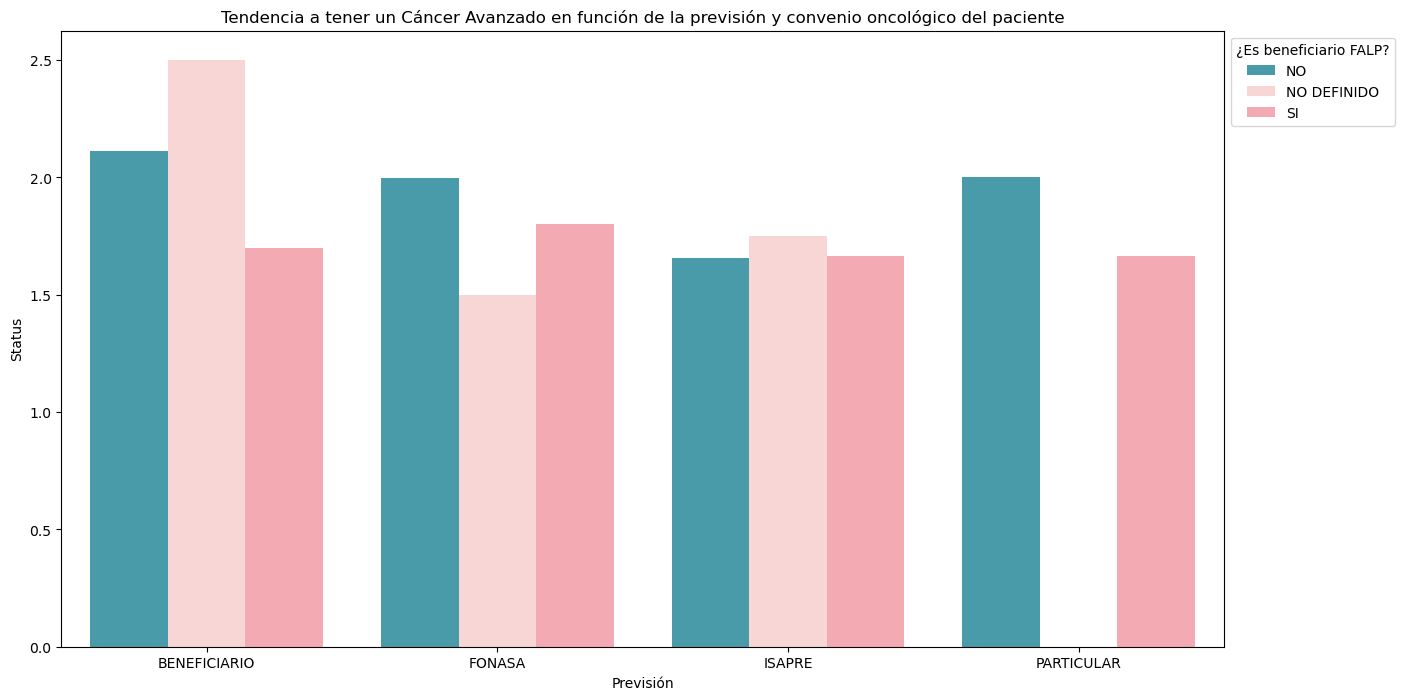

In [30]:
# Agrupamos PREVISION Y CONVENIO_ONCOLOGICO en función de STATUS
grouped_data = mama_preproc.groupby(["PREVISION", "CONVENIO_ONCOLOGICO"]).agg(
    {"STATUS": ["count", "sum"]}
)

# Calcular la probabilidad de STATUS
grouped_data["status_probability"] = grouped_data["STATUS"]["sum"] / grouped_data["STATUS"]["count"]

# Mostrar los resultados
print(grouped_data["status_probability"])
long_data = grouped_data["status_probability"].reset_index()

# Definir la paleta de colores
palette = ["#3AA6B9", "#FFD0D0", "#FF9EAA", "#C1ECE4", "#94D6E7", "#FFB1B3", "#FF6F7D", "#F5E1E3"]

# Creamos un gráfico de barras con Seaborn
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=long_data, x="PREVISION", y="status_probability", hue="CONVENIO_ONCOLOGICO", palette=palette)

plt.title("Tendencia a tener un Cáncer Avanzado en función de la previsión y convenio oncológico del paciente")
plt.xlabel("Previsión")
plt.ylabel("Status")

# Ajustar el cuadro de datos en la esquina derecha
ax.legend(title="¿Es beneficiario FALP?", bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

- Descripcion de resultados

In [ ]:
# Agrupamos 'RANGO_ETARIO', 'EXTENSION_DIAGNOSTICO' en función de STATUS
grouped_data = mama_preproc.groupby(["RANGO_ETARIO", "EXTENSION_DIAGNOSTICO"]).agg(
    {"STATUS": ["count", "sum"]}
)

# Calcular la probabilidad de STATUS
grouped_data["status_probability"] = grouped_data["STATUS"]["sum"] / grouped_data["STATUS"]["count"]

# Mostrar los resultados
print(grouped_data["status_probability"])
long_data = grouped_data["status_probability"].reset_index()

# Filtrar la categoría "Niños" en el DataFrame
long_data = long_data[long_data["RANGO_ETARIO"] != "Niños"]

# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=long_data,
    x="EXTENSION_DIAGNOSTICO",
    y="status_probability",
    hue="RANGO_ETARIO",
    hue_order=long_data[long_data["RANGO_ETARIO"] != "Niños"]["RANGO_ETARIO"].unique(),
    palette=palette
)

plt.title("Tendencia a tener un Cáncer Avanzado en función de la extensión del diagnóstico y el rango etario de los pacientes")
plt.xlabel("Extensión del diagnóstico")
plt.ylabel("Status")

# Ajustar etiquetas de datos
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        label = f"{height:.2f}"
        ax.annotate(label, (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

# Eliminar la leyenda para la categoría "Niños"
handles, labels = ax.get_legend_handles_labels()
handles = [h for h, l in zip(handles, labels) if l != "Niños"]
labels = [l for l in labels if l != "Niños"]
ax.legend(handles, labels)

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear un nuevo DataFrame sin la etiqueta "Niños" en RANGO_ETARIO
mama_preproc_filtered = mama_preproc[~((mama_preproc["RANGO_ETARIO"] == "Niños") & (mama_preproc["EXTENSION_DIAGNOSTICO"].isna()))]

# Agrupar 'RANGO_ETARIO', 'EXTENSION_DIAGNOSTICO' en función de STATUS
grouped_data = mama_preproc_filtered.groupby(["RANGO_ETARIO", "EXTENSION_DIAGNOSTICO"]).agg(
    {"STATUS": ["count", "sum"]}
)

# Calcular la probabilidad de STATUS
grouped_data["status_probability"] = grouped_data["STATUS"]["sum"] / grouped_data["STATUS"]["count"]

# Mostrar los resultados
print(grouped_data["status_probability"])
long_data = grouped_data["status_probability"].reset_index()

# Filtrar la etiqueta "Niños" en los datos
long_data = long_data[~long_data["RANGO_ETARIO"].isin(["Niños"])]

# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=long_data,
    x="EXTENSION_DIAGNOSTICO",
    y="status_probability",
    hue="RANGO_ETARIO",
    palette=palette
)

plt.title("Probabilidad de tener STATUS alto en función de Diagnóstico y Rango Etario")
plt.xlabel("EXTENSION DIAGNOSTICO")
plt.ylabel("Probabilidad de STATUS")

# Ajustar etiquetas de datos
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

# Mostrar el gráfico
plt.show()

In [ ]:
# agrupamos 'RANGO_ETARIO',"EXTENSION_DIAGNOSTICO" en funcion de STATUS
grouped_data = mama_preproc.groupby(["CN", "EXTENSION_DIAGNOSTICO"]).agg(
    {"STATUS": ["count", "sum"]}
)

# Calcular la probabilidad de STATUS
grouped_data["status_probability"] = grouped_data["STATUS"]["sum"] / grouped_data["STATUS"]["count"]

# Mostrar los resultados
print(grouped_data["status_probability"])
long_data = grouped_data["status_probability"].reset_index()

# Creamos un gráfico de barras con Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(
    data=long_data,
    x="EXTENSION_DIAGNOSTICO",
    y="status_probability",
    hue="CN",
    palette = palette
)

plt.title("Probabilidad de tener STATUS alto en funcion de CT y EXTENSION_DIAGNOSTICO")
plt.xlabel("EXTENSION DIAGNOSTICO")
plt.ylabel("Probabilidad de STATUS")

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear un nuevo DataFrame sin la clasificación "Niños" en la variable "RANGO_ETARIO"
mama_preproc_filtered = mama_preproc[mama_preproc["RANGO_ETARIO"] != "Niños"].copy()

# Renombrar la variable "RANGO_ETARIO" a "edad" en el nuevo DataFrame
mama_preproc_filtered.rename(columns={"RANGO_ETARIO": "edad"}, inplace=True)

# Mostrar el nuevo DataFrame sin la clasificación "Niños" y con el nombre de variable actualizado
print(mama_preproc_filtered)

RANGO_ETARIO  EXTENSION_DIAGNOSTICO
Niños         AVANZADO                      NaN
              LOCAL                         NaN
              NO DEFINIDO                   NaN
              REGIONAL                      NaN
Jovenes       AVANZADO                      NaN
              LOCAL                    2.000000
              NO DEFINIDO                   NaN
              REGIONAL                 3.000000
Adultos       AVANZADO                 3.000000
              LOCAL                    1.503401
              NO DEFINIDO              2.000000
              REGIONAL                 2.460465
Adulto mayor  AVANZADO                 2.934783
              LOCAL                    1.502155
              NO DEFINIDO              1.666667
              REGIONAL                 2.532374
Name: status_probability, dtype: float64


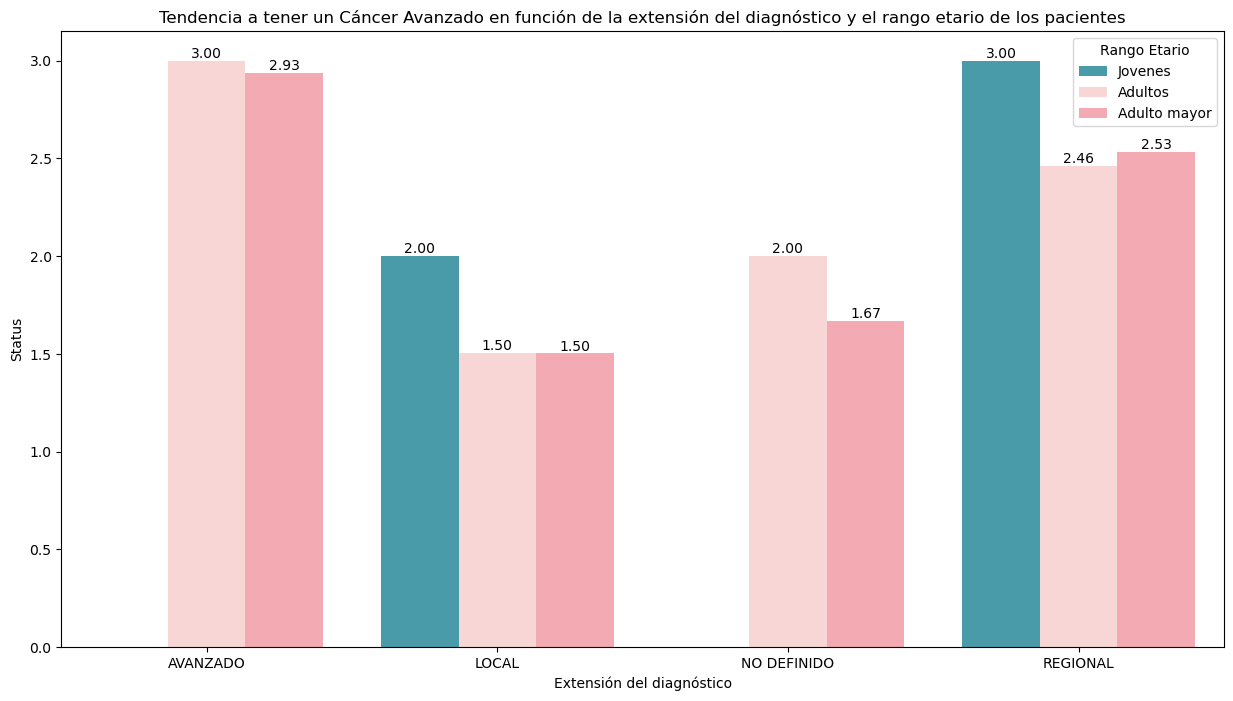

In [31]:
# Agrupamos 'RANGO_ETARIO', 'EXTENSION_DIAGNOSTICO' en función de STATUS
grouped_data = mama_preproc.groupby(["RANGO_ETARIO", "EXTENSION_DIAGNOSTICO"]).agg(
    {"STATUS": ["count", "sum"]}
)

# Calcular la probabilidad de STATUS
grouped_data["status_probability"] = grouped_data["STATUS"]["sum"] / grouped_data["STATUS"]["count"]

# Mostrar los resultados
print(grouped_data["status_probability"])
long_data = grouped_data["status_probability"].reset_index()

# Filtrar la categoría "Niños" en el DataFrame
long_data = long_data[long_data["RANGO_ETARIO"] != "Niños"]

# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=long_data,
    x="EXTENSION_DIAGNOSTICO",
    y="status_probability",
    hue="RANGO_ETARIO",
    hue_order=long_data["RANGO_ETARIO"].unique(),
    palette=palette
)

plt.title("Tendencia a tener un Cáncer Avanzado en función de la extensión del diagnóstico y el rango etario de los pacientes")
plt.xlabel("Extensión del diagnóstico")
plt.ylabel("Status")

# Ajustar el cuadro de datos en la esquina derecha
ax.legend(title="Rango Etario", bbox_to_anchor=(1, 1))

# Ajustar etiquetas de datos
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        label = f"{height:.2f}"
        ax.annotate(label, (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

# Mostrar el gráfico
plt.show()

# **6. Modelamiento**

In [ ]:
modelos = [
    {
        "nombre": "Regresion Logstica",
        "modelo": LogisticRegression(),
        "param_grid": {
            "penalty": ["l1", "l2"],
            "C": [0.01, 0.1, 1.0, 10.0],
            "fit_intercept": [True, False],
            "solver": ["liblinear", "saga"],
            "max_iter": [100, 200, 300],
        },
    },
    {
        "nombre": "Naive Bayes",
        "modelo": MultinomialNB(),
        "param_grid": {
            "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            "fit_prior": [True, False],
        },
    },
    {
        "nombre": "Arbol Clasificacion",
        "modelo": DecisionTreeClassifier(),
        "param_grid": {
            "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
            "max_leaf_nodes": [10, 50, 100],
            "criterion": ["gini", "entropy"],
            "min_samples_split": [0.05, 2],
        },
    },
    {
        "nombre": "Random Forest",
        "modelo": RandomForestClassifier(min_samples_split=2),
        "param_grid": {
            "max_depth": [5, 6, 7, 8, 9, 10],
            "n_estimators": [500, 600, 700, 800, 900, 1000],
            "max_leaf_nodes": [10, 50, 100],
        },
    },
    {
        "nombre": "Gradient Boosting",
        "modelo": GradientBoostingClassifier(min_samples_split=2),
        "param_grid": {
            "max_depth": [5, 6, 7, 8, 9, 10],
            "learning_rate": [0.001, 0.01, 0.1, 1],
            "max_leaf_nodes": [10, 50, 100],
        },
    },
    {
        "nombre": "SVM",
        "modelo": SVC(),
        "param_grid": {"C": [0.1, 1, 10, 100], "kernel": ["linear", "poly"], "degree": [2, 3, 4]},
    },
]

modelos_sin_controversia = modelos.copy()


## 6.1 Entrenamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=1)


In [ ]:
fx.entrenar_ensamble_de_modelos_gridcv(modelos, X_train, X_test, y_train, y_test)


## 6.2 Resultados

- Los resultados de todos los modelos entrenados fueron los siguientes:

|Modelo|Accuracy en Grid Search|Validacion - Recall STATUS 1|Validacion - Recall STATUS 2|Validacion - Recall STATUS 3|Validacion - Accuracy|
|------|-----------------------|---------------------|---------------------|---------------------|---------------------|
Regresion Logistica|0.91|0.94|0.95|0.90|0.93|
Naive Bayes|0.85|0.92|0.86|0.83|0.88|
Arbol de Clasificacion|0.89|0.96|0.95|0.84|0.92|
Random Forest|0.90|0.96|0.95|0.84|0.93|
Gradient Boosting|0.93|0.96|0.92|0.95|0.94|
SVM|0.90|0.94|0.93|0.89|0.92|

- Se puede observar que la gran parte de los modelos presentan desempenos sobre 0.83.

- Al centrarse en las metricas de recall (1, 2 y 3) se observa que los modelos de regresion logistica
y gradient boosting presentan los mejores desempenos (ambos presentan desempenos sobre 0.9 en
cada metrica). Al comparar la metrica de recall STATUS 3 (los pacientes mas graves), se osberva
que el modelo de gradient boosting es mejor que el de regresion logistica. Debido a lo anterior,
el modelo de gradient boosting es el mejor entrenado.

- Al centrarse en la metrica de accuracy de validacion se observa que el modelo de gradient
boosting es el mejor.

## 6.3 Serializacion - Exportacion de Modelos Entrenados

In [ ]:
with open("modelos_serializados_cancer_mama.pickle", "wb") as file:
    pickle.dump(modelos, file)

In [ ]:
with open("modelos_serializados_cancer_mama.pickle", "rb") as file:
    modelos_importados = pickle.load(file)


## 6.4 Prediccion con muestra de validacion externa

In [ ]:
mama_sin_estadio_preproc = fx.preprocesar_dataset_cancer_mama(mama_sin_estadio)

X_val = mama_sin_estadio_preproc.copy()
diferencias_cols = list(set(mama_preproc.columns) - set(X_val.columns))
X_val[diferencias_cols] = 0
X_val = X_val[mama_preproc.columns].drop(columns="STATUS")

X_val, _ = fx.obtener_vars_indicadoras(X_val, encoder_training)


In [ ]:
yhat = modelos[4]["modelo"].predict(X_val)
mama_sin_estadio_preproc["STATUS_pred"] = yhat


In [ ]:
display(mama_sin_estadio_preproc)


- Por lo tanto, se observa que es posible asignar un estadio a 102 pacientes que carecen de uno.

In [ ]:
mama_sin_estadio_preproc.query("STATUS_pred == 3")


- Ademas, se predijo que 16 pacientes presentan un estadio nivel 3. Esto podria permitir la atencion
urgente de tales pacientes.

In [ ]:
importancia_vars = fx.obtener_desempeno_variables(modelos[4]["modelo"].best_estimator_)
importancia_vars.set_index("vars").head(10).plot(kind="bar")
plt.title("Importancia de variables en modelo de Gradient Boosting")
plt.savefig("importancia_de_variables.png", transparent=True, dpi=300, bbox_inches="tight")
plt.show()


## 6.5 Parametros Regresion Logistica

In [ ]:
importancia_vars_logistico = fx.obtener_desempeno_variables(
    modelos[0]["modelo"].best_estimator_
).set_index("vars")
importancia_distintas_a_0 = importancia_vars_logistico.query("importancia != 0")
importancia_distintas_a_0.plot(kind="bar")
plt.title("Importancia de variables en modelo de Regresion Logistica")
plt.show()

In [ ]:
importancia_distintas_a_0["incremento_probabilidad"] = importancia_distintas_a_0[
    "importancia"
].apply(fx.convertir_a_probabilidad)
importancia_distintas_a_0.plot(kind="bar", y="incremento_probabilidad")
plt.title("Cambio de probabilidades al incrementar una unidad modelo regresion logistica")
plt.show()

## 6.6 Modelos sin variables controversiales

In [ ]:
mama_preproc_sin_controversia = mama_preproc.drop(columns=["SEXO", "REGION", "COMUNA", "PREVISION"])

In [ ]:
X = mama_preproc_sin_controversia.drop(columns=["STATUS"])
y = mama_preproc_sin_controversia["STATUS"]


X, encoder_training = fx.obtener_vars_indicadoras(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=1)

In [ ]:
fx.entrenar_ensamble_de_modelos_gridcv(modelos_sin_controversia, X_train, X_test, y_train, y_test)

- En general se peude observar que los modelos mejoraron su desempeno al utilizar solamente
variables de Localizacion, Examenes y Tratamientos.

- En especifico, el modelo de Gradient boosting aumento todas sus metricas, exceptuando recall
de STATUS 3. Por lo tanto, el modelo que se centra en las variables de Localizacion, Examenes y
Tratamientos es el mejor.